## International Sports Events: Window Dressing and Repression

* This is a project created in the context of the course: "Applied Machine Learning".
* In this assignment we will replicate partly a study on the relationship between repression in autocratic regimes and international sports events:
    * Scharpf, A., Gläßel, C., Pearce, E. (2022) *International Sports Events and Repression in Autocracies: Evidence from the 1978 FIFA World Cup*, American Political Science Review, 1-18.  https://doi:10.1017/S0003055422000958.
* Data are obtained from: 
    - Replication Data for: International Sports Events and Repression in Autocracies: Evidence from the 1978 FIFA World Cup: (https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I)
* The analysis will be done on [Jupyter](http://jupyter.org/) 

-----

> Evangelia P. Panourgia, Undergraduate Student <br>
> Id : t8190130 <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> eva.panourgiaa@gmail.com

## Import packages

* To begin with, we will import the packages, that we will use in the following segments of the project:
    * [pandas](https://pandas.pydata.org/docs/)
    * [numpy](https://numpy.org/)
    * [seaborn](http://seaborn.pydata.org/)
    * [matplotlib](https://matplotlib.org/)
    * [statsmodels](https://www.statsmodels.org/stable/index.html)
    * [os](https://docs.python.org/3/library/os.html)
* Note that the prementioned packages must be **locally installed** too in order to be used.

In [2088]:
# import all needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
from matplotlib.patches import Rectangle

import os # linux - windows read file

import warnings
warnings.filterwarnings('ignore')

## Obtain the data

* The data used for this analysis can be found in the folder ``data``:
    * ``figure_1_data.tab``
    * ``figure_SI11_data.tab`` 
    * ``main_data.tab``
  
* All of ``*.tab`` files conatin data from [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I). In addition, all of these files are part of "Replication Data for: International Sports Events and Repression in Autocracies: Evidence from the 1978 FIFA World Cup".

* We will talk more about them in the following parts.

* Dataset Citation: 
    * Scharpf, Adam; Glaessel, Christian; Edwards, Pearce, 2022, "Replication Data for: International Sports Events and Repression in Autocracies: Evidence from the 1978 FIFA World Cup", https://doi.org/10.7910/DVN/RJY34I, Harvard Dataverse, V1, UNF:6:VA4FZSq7tDhtfBaDvEp6sQ== [fileUNF]

### Q1: Overview

## Data 
* The data downloaded from **Harvand Dataverse**, 
Replication Data for: International Sports Events and Repression in Autocracies: Evidence from the 1978 FIFA World Cup. Data refers to international sports events shape repression in authoritarian host countries. 
* To get them, we vivited the website [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I).
    * We clicked in the file named: ``main_data.tab``, then we clicked in the botton **Open in New Window** and then we clicked **Download File**.
* The downloaded file named: ``main_data.tab`` and can be found in the ``data`` folder. 

Fisrtly, we will replicate **SI.3.1.** Table from Supporting Information.

* We will generate a general dataframe named ``main`` using the ``data/main_data.tab`` file.
    * This is beause of the fact that data from ``main`` dataframe will be used many times in this assignments, so we will assign them in the new dataframes we will need.

In [2089]:
path = os.path.abspath("data/main_data.tab") # path exists data for running in linux , too.
main = pd.read_csv(path, sep="\t")

Dataframe for  **q1_table_1**

* We will specify the columns that we need for our analysis (**usecols** parameter).

In [2090]:
q1_table_1 = main[['repression', 'lnrepression', 'dumrepression',
                   'hostcity','prox_hotelonly','prox_hotelpress',
                    'time', 'time2', 'time3' , 
                    'lnpop_1970', 'literacy_avg', 'vote_frejuli', 
                    'lnrebact1974', 'lnrepression70_77', 'latitude',
                    'lnstrikes', 'lnlag_strikes', 'lnlag2_strikes',
                    'zone1', 'zone2', 'zone3', 'zone4', 'zone5']]
# let's preview a sapme of the data
q1_table_1.sample(10)

,repression,lnrepression,dumrepression,hostcity,prox_hotelonly,prox_hotelpress,time,time2,time3,lnpop_1970,...,lnrepression70_77,latitude,lnstrikes,lnlag_strikes,lnlag2_strikes,zone1,zone2,zone3,zone4,zone5
51250,0.0,0.0,0.0,0.0,7.818820,7.818820,0.04,0.0016,0.000064,10.304342,...,0.000000,-34.133996,0.0,0.0,0.0,0,0,1,0,0
92045,0.0,0.0,0.0,0.0,3.697439,3.697439,0.63,0.3969,0.250047,10.968767,...,1.609438,-27.472401,0.0,0.0,0.0,0,1,0,0,0
56935,0.0,0.0,0.0,0.0,7.132124,7.132124,0.61,0.3721,0.226981,10.026811,...,0.000000,-29.985695,0.0,0.0,0.0,0,1,0,0,0
42281,0.0,0.0,0.0,0.0,5.992313,5.992313,NaN,NaN,NaN,9.372459,...,0.000000,-27.034819,0.0,0.0,0.0,0,1,0,0,0
71184,0.0,0.0,0.0,0.0,4.675831,4.740398,1.06,1.1236,1.191016,7.856707,...,0.000000,-22.128710,0.0,0.0,0.0,0,0,1,0,0
1196,0.0,0.0,0.0,0.0,8.536551,8.536551,0.66,0.4356,0.287496,NaN,...,0.000000,-34.012140,0.0,0.0,0.0,1,0,0,0,0
122105,0.0,0.0,0.0,0.0,8.027783,8.209035,1.07,1.1449,1.225043,9.029657,...,0.000000,-28.690873,0.0,0.0,0.0,0,0,1,0,0
13500,0.0,0.0,0.0,0.0,6.888232,6.913795,0.42,0.1764,0.074088,9.260463,...,0.000000,-37.359021,0.0,0.0,0.0,1,0,0,0,0
46826,0.0,0.0,0.0,0.0,4.898069,4.928441,NaN,NaN,NaN,8.021584,...,0.000000,-44.030157,0.0,0.0,0.0,0,0,0,0,1
117471,0.0,0.0,0.0,0.0,9.018168,9.068138,0.29,0.0841,0.024389,11.043242,...,3.332205,-33.485732,0.0,0.0,0.0,0,1,0,0,0


* We will detect the missing values for the column ``time`` (this is the x-axis that will be used for our plots next). 

In [2091]:
q1_table_1['time'].isnull().sum() # from replication do 

75349

* We observe that there are **75349** missing values for the column **time**.
* We will only store the rows that have not missing values.

In [2092]:
q1_table_1 = q1_table_1[q1_table_1['time'].notna()] # hold only values of time (rows) that have value in time. 
q1_table_1['time'].isnull().sum() # check if the change passed 

0

* We will apply descriptive statistics to see **count**, **mean**, **std**, **min**, **max**.
    * The fields: **25%**, **50%** and **75%** are not useful for this analysis so in the next stage we will drop them.
* We will reverse the df for better appearance(**T**).

In [2093]:
q1_table_1 = q1_table_1.describe().T
# drop columns: 25% 50% 75% 
q1_table_1 = q1_table_1.drop(columns=['25%', '50%', '75%'])
q1_table_1 # let's preview the data frame.

,count,mean,std,min,max
repression,58107.0,0.005042,0.103921,0.000000e+00,7.000000
lnrepression,58107.0,0.002910,0.052788,0.000000e+00,2.079442
dumrepression,58107.0,0.003390,0.058128,0.000000e+00,1.000000
hostcity,58383.0,0.010020,0.099598,0.000000e+00,1.000000
prox_hotelonly,58107.0,7.000045,1.613191,0.000000e+00,9.398466
prox_hotelpress,58107.0,7.078650,1.628709,0.000000e+00,9.398466
time,58383.0,0.590000,0.337740,1.000000e-02,1.170000
time2,58383.0,0.462167,0.411383,1.000000e-04,1.368900
time3,58383.0,0.407277,0.460040,9.999999e-07,1.601613
lnpop_1970,56628.0,9.701179,1.336451,6.056784e+00,14.904898


* We will create a new column named **Type** for replicating the given table. 

In [2094]:
# manually we fill the columns with the type given in paper-instructions.
q1_table_1['Type'] = ['Count','Continous','Binary',
                 'Binary','Continuous','Continous',
                 'Count','Count','Count',
                 'Continous','Continous','Continous',
                 'Continous','Continous','Continous',
                 'Continous','Continous','Continous',
                 'Binary','Binary','Binary',
                 'Binary','Binary', ] 

* We will change the siries of columns because we want the **Type** column be first. 

In [2095]:
q1_table_1 = q1_table_1[['Type'] + [x for x in q1_table_1.columns if x != 'Type']]

* We will rename the columns of the dataframe based on the given table that we want to replicate.

In [2096]:
# rename columns 
q1_table_1.rename(columns = {'count':'Obs.', 'mean':'Mean', 
                        'std':'Std. dev.', 'min':'Min.',
                        'max':'Max.'}, inplace = True)

* We will rename the index, too. Again, we will follow the names of the table that we want to replicate.  

In [2097]:
# rename index 
q1_table_1 = q1_table_1.rename(index={'repression': 'Repression events',
                             'lnrepression':'Repression events$^a$',
                             'dumrepression': 'Repression events',
                             'hostcity':'Host City',
                             'prox_hotelonly':'Proximity to Hotel', 
                             'prox_hotelpress':'Proximity to Journalist Venue',
                             'time':'Time',
                             'time2':'Time$^2$',
                             'time3':'Time$^3$',
                             'lnpop_1970':'Population Size$^a$',
                             'literacy_avg':'Literacy Rate',
                             'vote_frejuli':'Peronist Vote Share',
                             'lnrebact1974':'Rebel Activity$^a$',
                             'lnrepression70_77':'Past Repressiona$^a$',
                             'latitude':'Latitude',
                             'lnstrikes':'$Protest_{Current \ month}^a$',
                             'lnlag_strikes':'$Protest_{One \ month \ ago}^a$',
                             'lnlag2_strikes':'$Protest_{Two \ months \ ago}^a$',
                             'zone1':'Military Zone 1',
                             'zone2':'Military Zone 2',
                             'zone3':'Military Zone 3',
                             'zone4':'Military Zone 4',
                             'zone5':'Military Zone 5'
                            })

* We will do some tranformation related to the values of table.
    * We will change dtype to integer (column: **Obs.**).
    * We will round to 3 digits(columns: **Mean**, **Std. dev.**, **Min.**, **Max.**).

In [2098]:
# fix values 
q1_table_1['Obs.'] = q1_table_1['Obs.'].astype(int)
q1_table_1['Mean'] = q1_table_1['Mean'].round(decimals = 3)
q1_table_1['Std. dev.'] = q1_table_1['Std. dev.'].round(decimals = 3)
q1_table_1['Min.'] = q1_table_1['Min.'].round(decimals = 3)
q1_table_1['Max.'] = q1_table_1['Max.'].round(decimals = 3)

In [2099]:
print(' '*20 + 'Table SI.3.1. Summary statistics (Main analyses)')
print('________________________________________________________________________________________')
q1_table_1

                    Table SI.3.1. Summary statistics (Main analyses)
________________________________________________________________________________________


,Type,Obs.,Mean,Std. dev.,Min.,Max.
Repression events,Count,58107,0.005,0.104,0.000,7.000
Repression events$^a$,Continous,58107,0.003,0.053,0.000,2.079
Repression events,Binary,58107,0.003,0.058,0.000,1.000
Host City,Binary,58383,0.010,0.100,0.000,1.000
Proximity to Hotel,Continuous,58107,7.000,1.613,0.000,9.398
Proximity to Journalist Venue,Continous,58107,7.079,1.629,0.000,9.398
Time,Count,58383,0.590,0.338,0.010,1.170
Time$^2$,Count,58383,0.462,0.411,0.000,1.369
Time$^3$,Count,58383,0.407,0.460,0.000,1.602
Population Size$^a$,Continous,56628,9.701,1.336,6.057,14.905


$Note$: $^a$ Variable Logarithmized.

Dataframe for q1_table_2

* Now, we will replicate the table **SI.3.2**.
* We will specify the columns that we need.

In [2100]:
q1_table_2 = main[[ "repression", "lnrepression", 
                    "hostcity", "postwc_time3mdum",
                    "time_postwc", "time2_postwc", 
                    "time3_postwc","lnpop_1970", 
                    "vote_frejuli", "literacy_avg", 
                    "lnrebact1974", "lnrepression70_77", 
                    "zone1","zone2","zone3","zone4","zone5"]]
# let's preview a sapme of the data
q1_table_2.sample(10)

,repression,lnrepression,hostcity,postwc_time3mdum,time_postwc,time2_postwc,time3_postwc,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone1,zone2,zone3,zone4,zone5
77643,0.0,0.0,0.0,1.0,0.41,0.1681,0.068921,8.334472,45.2,0.791908,0.000000,0.000000,1,0,0,0,0
74236,0.0,0.0,0.0,NaN,NaN,NaN,NaN,8.125039,52.0,0.861635,0.000000,0.000000,1,0,0,0,0
65411,0.0,0.0,0.0,NaN,NaN,NaN,NaN,11.208030,55.7,0.801170,0.000000,0.000000,0,1,0,0,0
123103,0.0,0.0,0.0,NaN,NaN,NaN,NaN,11.687945,64.2,0.788510,0.693147,3.218876,0,0,1,0,0
117315,0.0,0.0,0.0,1.0,0.49,0.2401,0.117649,11.588098,46.0,0.865736,3.737670,1.386294,0,1,0,0,0
126441,0.0,0.0,0.0,1.0,0.63,0.3969,0.250047,9.535462,81.2,0.606786,0.693147,0.000000,0,0,1,0,0
27955,0.0,0.0,0.0,NaN,NaN,NaN,NaN,9.163563,54.9,0.835013,5.036952,0.000000,1,0,0,0,0
48141,0.0,0.0,0.0,0.0,0.19,0.0361,0.006859,7.675546,51.1,0.587706,0.000000,0.000000,0,0,0,0,1
35500,0.0,0.0,0.0,NaN,NaN,NaN,NaN,8.151622,62.5,0.722084,0.693147,0.000000,0,0,1,0,0
105000,0.0,0.0,0.0,1.0,0.62,0.3844,0.238328,10.204074,66.4,0.710775,0.000000,2.197225,0,0,1,0,0


In [2101]:
cols = q1_table_2.columns.tolist()
cols

['repression',
 'lnrepression',
 'hostcity',
 'postwc_time3mdum',
 'time_postwc',
 'time2_postwc',
 'time3_postwc',
 'lnpop_1970',
 'vote_frejuli',
 'literacy_avg',
 'lnrebact1974',
 'lnrepression70_77',
 'zone1',
 'zone2',
 'zone3',
 'zone4',
 'zone5']

* We will change the order of two columns so that we have the same replicated table. 
    * Reverse: ``vote_frejuli``, ``literacy_avg``

In [2102]:
q1_table_2 = q1_table_2[['repression',
 'lnrepression',
 'hostcity',
 'postwc_time3mdum',
 'time_postwc',
 'time2_postwc',
 'time3_postwc',
 'lnpop_1970', 
 'literacy_avg', # here 
 'vote_frejuli', # here
 'lnrebact1974',
 'lnrepression70_77',
 'zone1',
 'zone2',
 'zone3',
 'zone4',
 'zone5']]

* Now, we will repeat the similar preprocess with table SI.3.1.

In [2103]:
q1_table_2 = q1_table_2[q1_table_2['postwc_time3mdum'].notna()]
q1_table_2 = q1_table_2.describe().T
q1_table_2['Type'] = ['Count','Continous',
                 'Binary','Binary',
                 'Count','Count',
                 'Count','Continuous',
                 'Continous','Continous',
                 'Continous','Continous',
                 'Binary','Binary',
                 'Binary','Binary','Binary']
q1_table_2 = q1_table_2.drop(columns=['25%', '50%', '75%'])
q1_table_2 = q1_table_2[['Type'] + [x for x in q1_table_2.columns if x != 'Type']]
q1_table_2.rename(columns = {'count':'Obs.', 
                             'mean':'Mean', 
                             'std':'Std. dev.', 
                             'min':'Min.',
                             'max':'Max.'}, inplace = True)
# fix values 
q1_table_2['Obs.'] = q1_table_2['Obs.'].astype(int)
q1_table_2['Mean'] = q1_table_2['Mean'].round(decimals = 3)
q1_table_2['Std. dev.'] = q1_table_2['Std. dev.'].round(decimals = 3)
q1_table_2['Min.'] = q1_table_2['Min.'].round(decimals = 3)
q1_table_2['Max.'] = q1_table_2['Max.'].round(decimals = 3)
# rename index 
q1_table_2 = q1_table_2.rename(index={'repression': 'Repression events',
                           'lnrepression':'Repression events$^a$',
                           'hostcity':'Host City',
                           'postwc_time3mdum':'Post World Cup Period',
                           'time_postwc':'TimePost World Cup',
                           'time2_postwc':'$Time_{Post World Cup}^2$', 
                           'time3_postwc':'$Time_{Post World Cup}^3$',
                           'lnpop_1970':'Population Sizea$^a$',
                           'literacy_avg':'Literacy Rate',
                           'vote_frejuli':'Peronist Vote Share',
                           'lnrebact1974':'Rebel Activitya$^a$',
                           'lnrepression70_77':'Past Repression$^a$',
                           'zone1':'Military Zone 1',
                           'zone2':'Military Zone 2',
                           'zone3':'Military Zone 3',
                           'zone4':'Military Zone 4',
                           'zone5':'Military Zone 5'})

* The preprocess done, so we will print the table that we generated. 

In [2104]:
print(' '*20 + 'Table SI.3.2. Summary statistics (Post-World Cup period)')
print('________________________________________________________________________________________')
q1_table_2

                    Table SI.3.2. Summary statistics (Post-World Cup period)
________________________________________________________________________________________


,Type,Obs.,Mean,Std. dev.,Min.,Max.
Repression events,Count,58321,0.004,0.096,0.000,9.000
Repression events$^a$,Continous,58321,0.002,0.047,0.000,2.303
Host City,Binary,58383,0.010,0.100,0.000,1.000
Post World Cup Period,Binary,58383,0.786,0.410,0.000,1.000
TimePost World Cup,Count,58383,0.590,0.338,0.010,1.170
$Time_{Post World Cup}^2$,Count,58383,0.462,0.411,0.000,1.369
$Time_{Post World Cup}^3$,Count,58383,0.407,0.460,0.000,1.602
Population Sizea$^a$,Continuous,56628,9.701,1.336,6.057,14.905
Literacy Rate,Continous,56628,0.717,0.110,0.316,0.901
Peronist Vote Share,Continous,57447,58.752,11.539,28.500,94.300


$Note$: $^a$ Variable Logarithmized.

* Now, we will replicate the plot **Figure 1.** from **main** paper.

* First of  all, we will download the data from **Harvand Dataverse**.
* To get them, we visited the website [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I)
    * We click in the file named: ``figure_1_data.tab``, then we clicked in the botton **Open in New Window** and then we clicked **Download File**.
* The downloaded file named: ``figure_1_data.tab`` and can be found in the ``data`` folder. 

Dataframe for figure1 

In [2105]:
path = os.path.abspath("data/figure_1_data.tab")
fig1_main = pd.read_csv(path, sep="\t")
fig1_main

,postcwy,event_selec,autochost,autochostperc
0,1.0,25.0,2.0,8.000000
1,2.0,31.0,4.0,12.903226
2,3.0,25.0,5.0,20.000000
3,4.0,24.0,6.0,25.000000
4,5.0,30.0,6.0,20.000000
5,6.0,32.0,9.0,28.125000
6,7.0,27.0,10.0,37.037037


* We are ready to plot our graph with suitable customization: 
    * Define **x**, **y** data.
    * Define ticks and labels in the axis : x'x, y'y

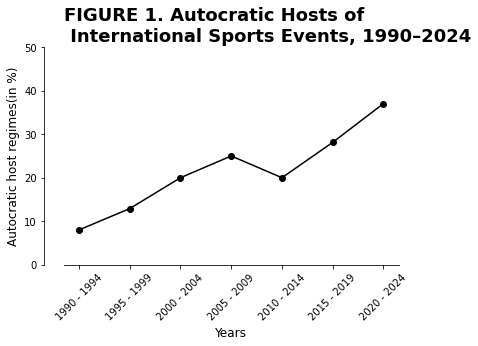

In [2106]:
fig, ax1 = plt.subplots(1,1)
xs = fig1_main['postcwy'] # data for x 
ys = fig1_main['autochostperc'] # data for y 

plt.plot(xs, ys, '-o', label='line with select markers') # define marker 

# customize for x'x axis.
x1 = [1,2,3,4,5,6,7]
squad = ['1990 - 1994',
         '1995 - 1999',
         '2000 - 2004',
         '2005 - 2009', 
         '2010 - 2014', 
         '2015 - 2019', 
         '2020 - 2024']

# customize for y'y axis 
y1 = [0,10,20,30,40,50]
labels_y = ['0','10','20','30','40','50']

# put ticks labels for the axis x'x y'y
ax1.set_xticks(x1)
ax1.set_xticklabels(squad, 
                    minor=False, 
                    rotation=45)
ax1.set_yticks(y1)
ax1.set_yticklabels(labels_y, 
                    minor=False)

# define color 
plt.gca().get_lines()[0].set_color("black")

# pot titles in the axis x'x y'y 
plt.xlabel("Years", fontsize=12)
plt.ylabel("Autocratic host regimes(in %)", fontsize=12)

# displaying the title
plt.title("FIGURE 1. Autocratic Hosts of  \n International Sports Events, 1990–2024", 
          fontsize=18, 
          loc='left',\
          fontweight="bold")

# format for asthetic in axis x'x y'y 
ax1.spines['left'].set_position(('outward', 20))

# remove up-right "axis"
for spine in ['top', 'right']:
    ax1.spines[spine].set_visible(False)
# show plot 
plt.show()

$Note$: Graph shows the five-year shares of autocratic states
among all hosting nations of the world championships in athletics,
basketball, cricket, football, handball, ice hockey, rugby, table
tennis, and volleyball, as well as the Summer and Winter
Olympics. See Figure SI.1.1 for a breakdown of all tournaments
and hosts since 1945.

* Fine, we managed to plot **Figure 1.** from main paper, [doi]( https://doi:10.1017/S0003055422000958). 

* Now we will replicate **Figure SI.1.1** from Supporting Information.

* The data downloaded from **Harvand Dataverse**.

* Dataframe for **fig_SI11**

* To get thme we visited the website [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I).
    * We click in the file named: ``figure_SI11_data.tab``, then we clicked in the botton **Open in New Window** and then we clicked **Download File**. 
* The downloaded file named: ``figure_SI11_data.tab`` and can be found in the data folder.

In [2107]:
path = os.path.abspath("data/figure_SI11_data.tab")
fig_SI11 = pd.read_csv(path, sep="\t")
fig_SI11

,year,regime,baseline,democ,autoc
0,1987.0,0.0,2.5,3.0,NaN
1,1987.0,0.0,2.5,3.0,NaN
2,1991.0,0.0,2.5,3.0,NaN
3,1991.0,0.0,2.5,3.0,NaN
4,1995.0,1.0,2.5,NaN,2.0
...,...,...,...,...,...
328,2010.0,0.0,27.5,28.0,NaN
329,2014.0,0.0,27.5,28.0,NaN
330,2018.0,0.0,27.5,28.0,NaN
331,2018.0,0.0,27.5,28.0,NaN


* Before plotting with suitable customization, we will group our data based on the column baseline.
* In addition, we will use the **unique** values from column **baseline** (look **list** in code in the down cell) plotting each time the subplot with given baseline.

In [2108]:
fig_SI11['baseline'].unique() # the unique values of column baseline 

array([ 2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. , 27.5])

* Then, we will use matplotlib and specifically **stem** function to replicate the given plot. 

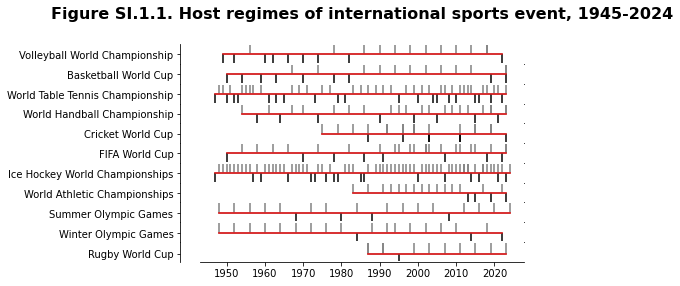

In [2109]:
# Source : https://matplotlib.org/2.1.0/gallery/subplots_axes_and_figures/ganged_plots.html
# Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html
# Source: https://towardsdatascience.com/handling-plot-axis-spines-in-python-f143b8554da2
fig2 = fig_SI11.groupby('baseline') # group based on baseline column 
fig, axs = plt.subplots(11, 1, sharex=True) # multiple subplots to the same plot 
fig.subplots_adjust(hspace=0)

list = [2.5,5,7.5,10,12.5,15,17.5,20,22.5,25,27.5] # the unique values of column baseline  

flag,  axis_y_flag= 10, 10

# define list with names - labels of y axis 
list_names_y_axis = ['Volleyball World Championship', 
    'Basketball World Cup', 
    'World Table Tennis Championship',
    'World Handball Championship',
    'Cricket World Cup',
    'FIFA World Cup',
    'Ice Hockey World Championships',
    'World Athletic Championships',
    'Summer Olympic Games',
    'Winter Olympic Games',
    'Rugby World Cup']

for i in list:
    
    fig2_event=fig2.get_group(i) 
    
    axs[flag].stem(fig2_event['year'], # sub group for democ color grey 
                   fig2_event['democ'], 
                   linefmt='grey', 
                   markerfmt=' ')
    
    axs[flag].stem(fig2_event['year'], # subgroup for autoc color black 
                   -fig2_event['autoc'], # - for "going down from the baseline the plot (black)"
                   linefmt='black', 
                   markerfmt=' ')
    
    axs[flag].tick_params(left = True)
    
    # put y axis correct names 
    axs[flag].set_yticks([0], labels=[list_names_y_axis[axis_y_flag]])
    axis_y_flag = axis_y_flag - 1
    flag = flag - 1 
    
    # fix axes aesthetics (blank)
    axs[flag].spines['left'].set_position(('outward', 20))
    for spine in ['top', 'right']:
        axs[flag].spines[spine].set_visible(False)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)

# displaying the title
plt.title("Figure SI.1.1. Host regimes of international sports event, 1945-2024", 
          fontsize=16, 
          x = 0.5,y=12,
          fontweight="bold")
 
plt.show()

$Note$: Black spikes indicate autocratic host regimes, grey spikes indicate democratic host
regimes.

* Fine, we managed to replicate the **SI.1.1** figure of Supporting Information.

## Q2: Repression in Departments with and without Host Cities

## Data

* The data downloaded again from [Harvand Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I).
    * Again for the reprication, we will use the file ``main_data.tab``.

* Dataframe for **df_q2**
    * We will generate a dataframe using the ``data/main_data.tab`` file (**main df** that already has been created).
    * We will specify the columns that we need for our analysis (**usecols** parameter).

In [2110]:
df_q2 = main[["lnrepression", "hostcitytime", 
                    "hostcitytime2", "hostcity",
                    "time", "time2", "lnpop_1970", 
                    "vote_frejuli", "literacy_avg", 
                    "lnrebact1974", "lnrepression70_77", 
                    "zone2","zone3","zone4","zone5"]]
df_q2.sample(10) # let's preview a sample of our data

,lnrepression,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5
15023,0.0,NaN,NaN,0.0,NaN,NaN,9.019180,57.0,0.808717,5.036952,0.000000,0,0,0,0
107797,0.0,0.0,0.0,0.0,0.03,0.0009,8.906528,63.8,0.746193,1.098612,0.000000,0,1,0,0
114204,0.0,NaN,NaN,0.0,NaN,NaN,8.967887,66.0,0.715646,1.386294,0.000000,0,1,0,0
16686,0.0,0.0,0.0,0.0,0.12,0.0144,12.919758,47.2,0.866415,5.036952,6.510258,0,0,0,0
106844,0.0,NaN,NaN,0.0,NaN,NaN,8.797700,90.2,0.542918,0.000000,0.000000,0,1,0,0
85362,0.0,0.0,0.0,0.0,0.80,0.6400,11.344377,67.5,0.783413,1.386294,2.564949,0,1,0,0
2435,0.0,NaN,NaN,0.0,NaN,NaN,10.431789,46.4,0.829975,5.036952,0.693147,0,0,0,0
80634,0.0,NaN,NaN,0.0,NaN,NaN,8.496378,69.0,0.670330,0.000000,0.000000,0,1,0,0
128611,0.0,NaN,NaN,0.0,NaN,NaN,8.870101,84.5,0.686981,0.693147,0.000000,0,1,0,0
78864,0.0,0.0,0.0,0.0,0.14,0.0196,8.818038,67.0,0.747475,0.000000,0.000000,0,1,0,0


* To start with, we will run the **first model** of **Table 1** (**Table SI.4.1: Linear regressions (OLS) for repression in departments with and without host cities**) of main paper.
    * Bearing in mind, the instructions from ``replication.do`` we will create the following **OLS** model: 
    * Model 1
        * reg ``lnrepression hostcitytime hostcitytime2 hostcity time time2``, **robust**.
	

In [2111]:
# Source for robust parameter : https://aeturrell.github.io/coding-for-economists/econmt-regression.html
q2_model_1 = smf.ols("lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2", 
                     data=df_q2)
q2_model_1 = q2_model_1.fit(cov_type="HC1") # parameter for robust !
q2_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     13.90
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           1.31e-13
Time:                        15:36:37   Log-Likelihood:                 89824.
No. Observations:               58107   AIC:                        -1.796e+05
Df Residuals:                   58101   BIC:                        -1.796e+05
Df Model:                           5                                         
Covariance Type:                  HC1                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0026      0.001      4.027      0.000       0.001       0.004
hostcitytime      0.4012      0.144      2.780      0.005       0.118       0.684
hostcitytime2    -0.3230      0.110     -2.923      0.003      -0.540      -0.106
hostcity          0.0202      0.034      0.591      0.554      -0.047       0.087
time             -0.0028      0.002     -1.233      0.218      -0.007       0.002
time2             0.0020      0.002      1.132      0.258      -0.001       0.006
==============================================================================
Omnibus:                   125118.610   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        514921392.904
Skew:                          19.504   Prob(JB):                         0.00
Kurtosis:                     462.518   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

* We will run the **second model** of **Table 1** (**Table SI.4.1: Linear regressions (OLS) for repression in departments with and without host cities**) of main paper.
    * Bearing in mind, the instructions from ``replication.do`` we will create the following **OLS** model: 
    * Model 2
        * reg ``lnrepression hostcitytime hostcitytime2 hostcity time time2 lnpop_1970 vote_frejuli literacy_avg lnrebact1974 lnrepression70_77``, **robust**.

In [2112]:
# lnpop_1970 vote_frejuli literacy_avg lnrebact1974 lnrepression70_77
q2_model_2 = smf.ols("lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77", 
                 data=df_q2)
q2_model_2 = q2_model_2.fit(cov_type="HC1")
q2_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     17.56
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           2.16e-32
Time:                        15:36:37   Log-Likelihood:                 86804.
No. Observations:               56394   AIC:                        -1.736e+05
Df Residuals:                   56383   BIC:                        -1.735e+05
Df Model:                          10                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0041      0.002     -2.056      0.040      -0.008      -0.000
hostcitytime          0.4014      0.143      2.801      0.005       0.121       0.682
hostcitytime2        -0.3231      0.110     -2.945      0.003      -0.538      -0.108
hostcity             -0.0037      0.034     -0.109      0.913      -0.070       0.063
time                 -0.0030      0.002     -1.297      0.195      -0.008       0.002
time2                 0.0022      0.002      1.190      0.234      -0.001       0.006
lnpop_1970            0.0010      0.000      4.623      0.000       0.001       0.001
vote_frejuli       -3.22e-05   1.86e-05     -1.727      0.084   -6.87e-05    4.34e-06
literacy_avg         -0.0056      0.001     -5.192      0.000      -0.008      -0.003
lnrebact1974         -0.0001      0.000     -0.939      0.348      -0.000       0.000
lnrepression70_77     0.0041      0.000     10.816      0.000       0.003       0.005
==============================================================================
Omnibus:                   119962.002   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        462693274.776
Skew:                          18.965   Prob(JB):                         0.00
Kurtosis:                     445.123   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* We will run the **thrid model** of **Table 1** (**Table SI.4.1: Linear regressions (OLS) for repression in departments with and without host cities**) of main paper.
    * Bearing in mind, the instructions from ``replication.do`` we will create the following **OLS** model: 
    * Model 3
       * reg ``lnrepression hostcitytime hostcitytime2 hostcity time time2 lnpop_1970 vote_frejuli literacy_avg lnrebact1974 lnrepression70_77 zone2-zone5``, **robust**.

In [2113]:
q2_model_3 = smf.ols("lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 +  zone2 + zone3 + zone4 + zone5", 
                     data=df_q2)
q2_model_3 = q2_model_3.fit(cov_type="HC1")
q2_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     12.96
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           3.72e-31
Time:                        15:36:37   Log-Likelihood:                 86946.
No. Observations:               56394   AIC:                        -1.739e+05
Df Residuals:                   56379   BIC:                        -1.737e+05
Df Model:                          14                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0039      0.002     -1.660      0.097      -0.009       0.001
hostcitytime          0.4014      0.142      2.825      0.005       0.123       0.680
hostcitytime2        -0.3231      0.109     -2.969      0.003      -0.536      -0.110
hostcity             -0.0040      0.034     -0.120      0.905      -0.070       0.062
time                 -0.0030      0.002     -1.296      0.195      -0.008       0.002
time2                 0.0022      0.002      1.190      0.234      -0.001       0.006
lnpop_1970            0.0033      0.000      7.884      0.000       0.002       0.004
vote_frejuli       1.047e-05   2.41e-05      0.434      0.664   -3.68e-05    5.78e-05
literacy_avg         -0.0231      0.002     -9.286      0.000      -0.028      -0.018
lnrebact1974         -0.0014      0.000     -6.792      0.000      -0.002      -0.001
lnrepression70_77     0.0032      0.000      8.267      0.000       0.002       0.004
zone2                -0.0147      0.002     -9.506      0.000      -0.018      -0.012
zone3                -0.0117      0.001     -9.012      0.000      -0.014      -0.009
zone4                -0.0082      0.004     -2.171      0.030      -0.016      -0.001
zone5                -0.0092      0.001     -9.207      0.000      -0.011      -0.007
==============================================================================
Omnibus:                   119662.654   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        456844768.905
Skew:                          18.855   Prob(JB):                         0.00
Kurtosis:                     442.318   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Having running **3** models as said, we will do a preprocess for replicating the given table.

* Firstly, we will create the values of columns (1), (2), (3)
    * Logic: 
        * Extract **intercept** && **coefficients** && **std** from the **summary**.
        * Impelemnting formatting as far as a) the digits (3 + round) and putting parentesis for std values. 
        * Filling missing values for some coefficients (this is because we want to have the same length in series to create the given dataframe)
        * If exist zone2-zone5: Remove these values **both** for coeeficinets and std. 
        * Move intercept to the last of coeficients order
        * Append **AIC**,**Pseudo R^2**,**Observations**,**ZoneFixed**

## Prepare values for column (**1**)

In [2114]:
list_coefs_model_copy_1 = q2_model_1.params.tolist() # coef ++ intercepts 
list_std_model_copy_1 = q2_model_1.bse.tolist() # std 

In [2115]:
# fromat round digit (3 digits)
list_coefs_model_1 = [round(item, 3) for item in list_coefs_model_copy_1]
list_std_model1 = [round(item, 3) for item in list_std_model_copy_1]

In [2116]:
# format parenthesis 
list_std_model_1 = []
for i in list_std_model1:
    list_std_model_1.append('(' + str(i) + ')')

* null before intercept 

In [2117]:
for i in range(5):list_coefs_model_1.append(" ") # missing values coeff
for i in range(5):list_std_model_1.append(" ") # missing values std 

In [2118]:
# insert coef to the correct order 
list_coefs_model_1.pop(0)
list_coefs_model_1.insert(len(list_coefs_model_1), 0.003)
# incert std intercept to teh correct order  
list_std_model_1.pop(0)
list_std_model_1.insert(len(list_std_model_1), 0.001) # value of intercept in the correct order

In [2119]:
# create-union fixed values for the first column 
list_final_lodel_1 = [] 
std_1 = 0
for coef_3 in list_coefs_model_1:
    list_final_lodel_1.append(coef_3)
    list_final_lodel_1.append(list_std_model_1[std_1])
    std_1 = std_1 + 1

In [2120]:
## add extra values 
list_final_lodel_1.append(0)# aic 
list_final_lodel_1.append(0.045)# psudo rsquared
list_final_lodel_1.append(13.90)# f statistic 
list_final_lodel_1.append(58107)# observations 
list_final_lodel_1.append('No')# zonefixed 

## Prepare values for column (**2**)

In [2121]:
list_coefs_model_copy_2 = q2_model_2.params.tolist() # coef ++ intercepts 
list_std_model_copy_2 = q2_model_2.bse.tolist() # std 

In [2122]:
# format 3 digits round 
list_coefs_model_2 = [round(item, 3) for item in list_coefs_model_copy_2]
list_std_model2 = [round(item, 3) for item in list_std_model_copy_2]

In [2123]:
# format parenthesis 
list_std_model_2 = []
for i in list_std_model2:
    list_std_model_2.append('(' + str(i) + ')')

In [2124]:
# insert coef 
list_coefs_model_2.pop(0)
list_coefs_model_2.insert(len(list_coefs_model_2), -0.004)
# incert std intercept 
list_std_model_2.pop(0)
list_std_model_2.insert(len(list_std_model_2), 0.002) # value of intercept in the correct order

In [2125]:
# create gixed values for teh first column 
list_final_lodel_2 = [] 
std_2 = 0
for coef_2 in list_coefs_model_2:
    list_final_lodel_2.append(coef_2)
    list_final_lodel_2.append(list_std_model_2[std_2])
    std_2 = std_2 + 1

In [2126]:
## add extra values 
list_final_lodel_2.append(0)# aic 
list_final_lodel_2.append(0.058)# psudo rsquared
list_final_lodel_2.append(17.56)# f statistic 
list_final_lodel_2.append(56394)# observations 
list_final_lodel_2.append('No')# zonefixed 

## Prepare values for column (**3**)

In [2127]:
list_coefs_model_copy_3 = q2_model_3.params.tolist() # coef ++ intercepts 
list_std_model_copy_3 = q2_model_3.bse.tolist() # std 

In [2128]:
# format 3 digits round 
list_coefs_model_3 = [round(item, 3) for item in list_coefs_model_copy_3]
list_std_model3 = [round(item, 3) for item in list_std_model_copy_3]

In [2129]:
# format parenthesis 
list_std_model_3 = []
for i in list_std_model3:
    list_std_model_3.append('(' + str(i) + ')')

In [2130]:
# remove 4 last values zone2-5
list_coefs_model_3.pop(-1)
list_coefs_model_3.pop(-1)
list_coefs_model_3.pop(-1)
list_coefs_model_3.pop(-1)
# remove for sts . . .
list_std_model_3.pop(-1)
list_std_model_3.pop(-1)
list_std_model_3.pop(-1)
list_std_model_3.pop(-1)

'(0.002)'

In [2131]:
# insert coef 
list_coefs_model_3.pop(0)
list_coefs_model_3.insert(len(list_coefs_model_3), -0.004)
# incert std intercept 
list_std_model_3.pop(0)
list_std_model_3.insert(len(list_std_model_3), 0.002) # value of intercept in the correct order 

In [2132]:
len(list_coefs_model_3) # last 3 coef preprocess

11

In [2133]:
# create gixed values for teh first column 
list_final_lodel_3 = [] 
std_3 = 0
for coef_3 in list_coefs_model_3:
    list_final_lodel_3.append(coef_3)
    list_final_lodel_3.append(list_std_model_3[std_3])
    std_3 = std_3 + 1 

In [2134]:
## add extra values 
list_final_lodel_3.append(0)# aic 
list_final_lodel_3.append(0.063)# pseudo rsquared
list_final_lodel_3.append(12.96)# F statistic 
list_final_lodel_3.append(56394)# observations 
list_final_lodel_3.append('Yes')# zonefixed 

## Replicate table

In [2135]:
# create dataframe with index and columns and values suitable 
df = pd.DataFrame(
   {
      "(1)": [i for i in list_final_lodel_1], # only values for model1 series: coefficient && std
      "(2)": [j for j in list_final_lodel_2], ## only values for model2 series: coefficient && std
      "(3)": [k for k in list_final_lodel_3] # # only values for model3 series: coefficient && std
   },
    # index values names of Table we want to replicate 
   index=[
           'Host City x Time', ' ',
            'Host City x $Time^2$', ' ',
            'Host City', ' ',
            'Time', ' ',
            '$Time^2$', ' ',
            'Population size', ' ',
            'Peronist vote share', ' ',
            'Literacy rate',' ',
            'Rebel activity', ' ',
            'Past repression', ' ',
            'Constant',' ', 
            'AIC', 
            'Adj. $R^2$',
            'F statistic',
            'Observations',
            'Zone fixed effects',
         ]
)

* let's print the table 

In [2136]:
print(' '*20 + 'TABLE 1. Repression in Departments with and without Host Cities')
print('__________________________________________________________________________________________________')
df

                    TABLE 1. Repression in Departments with and without Host Cities
__________________________________________________________________________________________________


,(1),(2),(3)
Host City x Time,0.401,0.401,0.401
,(0.144),(0.143),(0.142)
Host City x $Time^2$,-0.323,-0.323,-0.323
,(0.11),(0.11),(0.109)
Host City,0.02,-0.004,-0.004
,(0.034),(0.034),(0.034)
Time,-0.003,-0.003,-0.003
,(0.002),(0.002),(0.002)
$Time^2$,0.002,0.002,0.002
,(0.002),(0.002),(0.002)


## Interpret the results

# R-squared values && Adj.-𝑅-squared values
* $R^2$ increased compared to the previous models (1), (2). But this doesn't mean that our new model (3) fits the data better as it is knows that if we add independent variables to our model the R squared will increase.
* So, to avoid this increase in R squared, we will take adjusted R squared.
* However, it is kown that **adjusted R-squared values** range from **0 to 1** and the models have the the following {adjusted $R^2$}: **model1: 0.045,	model 2: 0.058, model 3: 0.063** which are low so model may not fit well the data.
* But, it is quite important to point out that adjust R-squared value is a measure of how well a  **linear model** fits a dataset. In other words, R-squared is a goodness-of-fit measure for linear regression models.  
* So, these low vaues of our adjusted R-squared may be an **insight** that our model is not linear, which will be verified from the plot in **q3** (see next in the jupyter).
* At this point, we will point out that the low value of adjusted R-squre is **irrelevant** for **explaining the relationship** between the predictors and response variable. R-squared is important if our main objective is to **predict** the value of the response variable accurately using the predictors variable.

* Inspiration sources : [here1](https://www.investopedia.com/terms/r/r-squared.asp#:~:text=What%20qualifies%20as%20a%20%E2%80%9Cgood%E2%80%9D%20R-Squared%20value%20will,be%20much%20higher%2C%20such%20as%200.9%20or%20above.), [here2](https://www.statology.org/good-r-squared-value/).
------------------------------------------------------------------------------------------------------------------
# Observations for the common independent variables  

* Before beggining to analyse the results (table and generated summaries) related to coefficients we will write down the 2 hypothesis that authors formulate: 
    
* H1: In the run-up to an international sports tournament, state repression spikes in host cities, but not in other cities.

* H2: During an international sports tourna- ment, state repression drops in host cities but remains unchanged in other cities.

Note: This is helpful for the meaning of coefficients.

* From the **common** coefficients in the three models we see that :
    *  Host City x Time has a positive effect on repression.(1)
    *  Host City x $𝑇𝑖𝑚𝑒^2$ has a negative effect on repression.(2)
        * At this point let's explain more what two these things (1), (2) mean bearing in mind the hypothesis (**H1**, **H2**). The positive effect of variable `Host City x Time` and negative effect of `Host City x $𝑇𝑖𝑚𝑒^2$` are verified bearing in mind the Hypotheses. In detail, we want to show that the **repression** for the **host cities** increases and then decreases. 
            - So, the positive coefficient of `Host City x Time` shows that as time increases the represion phenomena will be increased linearly in host cities.
            - But, the negative coefficient of `Host City x $𝑇𝑖𝑚𝑒^2$` shows that as time increases the represion phenomena will be decreased but **not** linearly (squared $time^2$) in host cities.  
    * At this point it is woth mentioning that **Host City** takes only two distinct values that is **0** and **1**. So, if **Host City** is equal with **0** the terms that contains host city will go to 0 too so **only** the other independent variables will have an impact on repression. So, next we will check the common variable **time** , **$time^2$** if they have high impact on the repression phenomena (dependent variable). 
    *  Host City for the first model is positive but for models (2), (3) is negative. 
    * **Time** has a negative relationship with repression. 
        - For model 1: coef = -0.0028, p-value = 0.218 > 0.05 so no statistically significant.
        - For model 2: coef = -0.0030, p-value = 0.195 > 0.05 so no statistically significant.
        - For model 3: coef = -0.0030 , p-value = 0.195 > 0.05 so no statistically significant.
    * **$Time^2$** has a positive relationship with repression.
        - For model 1: coef = 0.0020, p-value = 0.258 > 0.05 so no statistically significant.
        - For model 2: coef = 0.0022, p-value = 0.234 > 0.05 so no statistically significant.
        - For model 3: coef = 0.0022, p-value = 0.234 > 0.05 so no statistically significant.
    * As a whole general observation for the coeficients **Time** and **$Time^2$**, we observe that both coefficients have low values and are not statistically significant so they don't have high impact for the repression phenomena.
    * The effect of ``Host City x Time`` on the repression is much greater than effect of the other common independent variables (Host City x $Time^2$, Host City, Time, $Time^2$) as we observe that has the **highest coefficient** related to the other (common) independent variables and it has low **p-values** = **0.05** (it is **low**) so this coefficient is **statistically significant**. In other words, we would say that **repression** value (repression phenomena) is strongly influenced by ``Host City x Time``. 
    * In addition, high impact for repression phenoemena has the coefficient about `Host City x $𝑇𝑖𝑚𝑒^2$` as we observe that the value is **-0.323** (same value for (1), (2), (3) models) compared to other coefficients (except for the independent variable `Host City x Time`) and it is   statistically significant as (1),(2),(3) models have as p-value = 0.003 <= 0.05.  
----------------------------------------------------------------------------------------------------------------------------
## Check Relationship between dependent and independent variables - Εquation
* Let's write down the model replacing the coefficients and intercept from the table with column **1** (that is first OLS model that we generated):

$$ \ln(\mathrm{repression}) = 0.003 + 0.401(Host City x Time) - 0.323(Host City x Time^2) + 0.02(Host City) -0.003(Time) + 0.002(Time^2) $$

* If we take out the logarithms, the relationship becomes (we will use as base **e** as we have the **ln** logarithm): 

$$ \mathrm{repression} = e^{0.003}  \times \mathrm{e} ^{0.401(Host City x Time)} \times \mathrm{e} ^{- 0.323(Host City x Time^2)}   \times \mathrm{e} ^{0.02(𝐻𝑜𝑠𝑡𝐶𝑖𝑡𝑦)} \times \mathrm{e} ^{-0.003(Time)} \times \mathrm{e} ^{0.002(Time^2)}$$

* Making the calculations , where e = 2.71 we have: 

$$repression = 1.0029953229465558  \times \mathrm{e} ^{0.401(Host City x Time)} \times \mathrm{e} ^{- 0.323(Host City x Time^2)}   \times \mathrm{e} ^{0.02(𝐻𝑜𝑠𝑡𝐶𝑖𝑡𝑦)} \times \mathrm{e} ^{-0.003(Time)} \times \mathrm{e} ^{0.002(Time^2)}$$  

* As we said coefficients: hostcity, hostcitytime2,  are statitically significant ($p \ll 0.05$).

* Concerning the interpretation of the coefficients, the coefficient for ``Host City x Time`` is the increase in the repression when the ``Host City x Time``  is increased by one unit while keeping the other independent variable (Host City x $Time^2$, Host City, Time, $Time^2$) constant.
* In this case, `Host City x Time` takes the distinct values: **0** or **1**. So if `Host City x Time` = 1 (so Time = 1 as Host City x Time takes only 0 or 1 as values) , the result is: 
    * $$repression = 1.0029953229465558  \times \mathrm{e} ^{0.401(1)} \times \mathrm{e} ^{- 0.323(1)}   \times \mathrm{e} ^{0.02(1)} \times \mathrm{e} ^{-0.003(1)} \times \mathrm{e} ^{0.002(1)}$$ 
    * If we make these calculations we will have the value of repression \.

* The interpretation of the coefficient for other independent variables is symmetrical.
* The analysis for model (2), (3) is simillar (write down relation-equastion bearing in mind coeeficients and constant, taking out log, and making calculations). 
 

### Q3: Graphical Overview of Effects 

* The data downloaded again from [Harvand Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I).
    * Again for the reprication, we will use the data stemming from ``main_data.tab`` that is main df.
* Dataframe for **df_q3**
* We will specify the columns that we need for our analysis (**usecols** parameter).

In [2137]:
df_q3 = main[['lnrepression','hostcitytime','hostcitytime2',
                    'hostcity','time','time2','lnpop_1970',
                     'literacy_avg','vote_frejuli','lnrebact1974',
                     'lnrepression70_77','zone2','zone3','zone4','zone5']]
                    
df_q3.sample(10) # let's preview a sample of our data

,lnrepression,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,literacy_avg,vote_frejuli,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5
87553,0.0,NaN,NaN,0.0,NaN,NaN,11.784776,0.731642,56.1,1.386294,2.639057,0,1,0,0
97131,0.0,0.0,0.0,0.0,0.57,0.3249,9.719384,0.725309,61.9,0.000000,0.693147,0,0,0,1
41529,0.0,NaN,NaN,0.0,NaN,NaN,10.351438,0.689655,58.5,2.197225,0.000000,1,0,0,0
116227,0.0,NaN,NaN,0.0,NaN,NaN,7.721349,0.790795,44.4,0.000000,0.000000,0,0,0,1
41610,0.0,0.0,0.0,0.0,0.12,0.0144,9.722565,0.543230,56.6,2.197225,0.000000,1,0,0,0
82189,0.0,NaN,NaN,0.0,NaN,NaN,7.809541,0.670330,59.5,0.000000,0.000000,0,1,0,0
34174,0.0,0.0,0.0,0.0,0.80,0.6400,9.187072,0.675115,67.0,0.693147,0.693147,0,1,0,0
17551,0.0,0.0,0.0,0.0,0.73,0.5329,9.597031,0.829016,49.3,5.036952,0.000000,0,0,0,0
27372,0.0,NaN,NaN,0.0,NaN,NaN,9.644263,0.773050,49.7,5.036952,2.079442,0,0,0,0
133515,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0


* We will re-run the **3-rd** model from **(Q2)** 

In [2138]:
model_q3 = smf.ols("lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 +lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 + zone2 + zone3 + zone4 + zone5", data=df_q3)
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit.html
model_q3 = model_q3.fit(cov_type="HC1")
model_q3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     12.96
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           3.72e-31
Time:                        15:36:38   Log-Likelihood:                 86946.
No. Observations:               56394   AIC:                        -1.739e+05
Df Residuals:                   56379   BIC:                        -1.737e+05
Df Model:                          14                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0039      0.002     -1.660      0.097      -0.009       0.001
hostcitytime          0.4014      0.142      2.825      0.005       0.123       0.680
hostcitytime2        -0.3231      0.109     -2.969      0.003      -0.536      -0.110
hostcity             -0.0040      0.034     -0.120      0.905      -0.070       0.062
time                 -0.0030      0.002     -1.296      0.195      -0.008       0.002
time2                 0.0022      0.002      1.190      0.234      -0.001       0.006
lnpop_1970            0.0033      0.000      7.884      0.000       0.002       0.004
vote_frejuli       1.047e-05   2.41e-05      0.434      0.664   -3.68e-05    5.78e-05
literacy_avg         -0.0231      0.002     -9.286      0.000      -0.028      -0.018
lnrebact1974         -0.0014      0.000     -6.792      0.000      -0.002      -0.001
lnrepression70_77     0.0032      0.000      8.267      0.000       0.002       0.004
zone2                -0.0147      0.002     -9.506      0.000      -0.018      -0.012
zone3                -0.0117      0.001     -9.012      0.000      -0.014      -0.009
zone4                -0.0082      0.004     -2.171      0.030      -0.016      -0.001
zone5                -0.0092      0.001     -9.207      0.000      -0.011      -0.007
==============================================================================
Omnibus:                   119662.654   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        456844768.905
Skew:                          18.855   Prob(JB):                         0.00
Kurtosis:                     442.318   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Notes for summary: 
* Again we observe that adjusted R-squared is quite low. This may be an insight that linear regression does not suit best our model.
* As far as the coefficients, we observe that **hostcitytime** and **hostcitytime2** have high impact on the dependent variable 
as coefficients values are quite high compared to other coefficient values and p-values are <= **0.05**.
* In addition, we observe that **hostcity time** has a positive effect in dependent variable  whereas **hostcitytime2** has a negative impact in dependent variable. This means that it explains the two hypothesis (see in more detail the intrpretation of q3 is the same logic).

## Preperation for the first (sub) graph

* We will save to a variable the coeficients (**not** intercept) of model summary. 
* We will remove from the list the intercept.

In [2139]:
coef_list = model_q3.params.tolist() # take coefficients + intercept 
coef_copy = coef_list[1:] # remove intercept 

* We will create a df named `df_copy` without the dependent variable (y) that is lnrepression. 
    * We will remove duplicates 
    * We will remove missing values if exist 

In [2140]:
df_copy = df_q3[['hostcitytime','hostcitytime2','hostcity','time','time2',
              'lnpop_1970','vote_frejuli','literacy_avg','lnrebact1974',
              'lnrepression70_77','zone2','zone3','zone4','zone5']]
df_copy.drop_duplicates(inplace=True)
df_copy.dropna(inplace=True)

In [2141]:
df_copy

,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5
59,0.0,0.0,0.0,0.01,0.0001,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
60,0.0,0.0,0.0,0.02,0.0004,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
61,0.0,0.0,0.0,0.03,0.0009,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
62,0.0,0.0,0.0,0.04,0.0016,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
63,0.0,0.0,0.0,0.05,0.0025,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133367,0.0,0.0,0.0,1.13,1.2769,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0
133368,0.0,0.0,0.0,1.14,1.2996,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0
133369,0.0,0.0,0.0,1.15,1.3225,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0
133370,0.0,0.0,0.0,1.16,1.3456,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0


* At this point we will make some calculations. It is known that the relation of ols has the format : 
    * `y = ax1 + ax2 + .. + axn + b` 
    * So, firstly, we will calculate the (ax1,..,axn) and then we will add the b term (taht is intercept).

In [2142]:
pred = df_copy.dot(coef_copy) # for each row of the dataframe we have calculated y = (coef1 * x1) + .. + (coefn * xn) 

* We will create a new dataframe named `df_new` that coantins the **independent*** variables with the new calculation **pred**.

In [2143]:
df_new = df_copy.assign(pred = pred)

* We will add the intercept term in the column **pred**.

In [2144]:
df_new['pred'] = df_new['pred'] + coef_list[0]
df_new

,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,pred
59,0.0,0.0,0.0,0.01,0.0001,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002368
60,0.0,0.0,0.0,0.02,0.0004,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002398
61,0.0,0.0,0.0,0.03,0.0009,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002427
62,0.0,0.0,0.0,0.04,0.0016,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002456
63,0.0,0.0,0.0,0.05,0.0025,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133367,0.0,0.0,0.0,1.13,1.2769,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0,-0.006341
133368,0.0,0.0,0.0,1.14,1.2996,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0,-0.006322
133369,0.0,0.0,0.0,1.15,1.3225,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0,-0.006303
133370,0.0,0.0,0.0,1.16,1.3456,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0,-0.006284


* We can observe that the new dataframe has as last column the **prediction values** of **OLS model**.

In [2145]:
df_new_2 = df_new # we will save these dataframe to a new dataframe , it is helpful for the next steps. 
                  # See : Preperation for the second (sub) graph

* We will create a new dataframe that it includes only the rows thet filtered with the condition :  **hostcity** == **1**.

In [2146]:
test_df = df_new[(df_new['hostcity']==1)]

* We will remove the **ln** from y (**lnrepression**) because we observe that y axis of diagram that we want to replicate is **not** logarithmized.
    * So, we will use as base **e** [info-here](https://en.wikipedia.org/wiki/E_(mathematical_constant))
    * We will taking out ln using logarithm properties.
        

In [2147]:
# add a column with possible base of the logarithm 
list_base = []
for i in range(585): list_base.append(2.71828) # Source: https://en.wikipedia.org/wiki/E_(mathematical_constant)
test_df['base'] = list_base

In [2148]:
# calculate log 
test_df['out_log'] = test_df['base'].pow(test_df['pred']) 

In [2149]:
test_df

,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,pred,base,out_log
11583,0.01,0.0001,1.0,0.01,0.0001,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,0.028271,2.71828,1.028675
11584,0.02,0.0004,1.0,0.02,0.0004,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,0.032159,2.71828,1.032681
11585,0.03,0.0009,1.0,0.03,0.0009,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,0.035982,2.71828,1.036638
11586,0.04,0.0016,1.0,0.04,0.0016,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,0.039742,2.71828,1.040542
11587,0.05,0.0025,1.0,0.05,0.0025,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,0.043437,2.71828,1.044394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119431,1.13,1.2769,1.0,1.13,1.2769,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,0.056692,2.71828,1.058330
119432,1.14,1.2996,1.0,1.14,1.2996,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,0.053391,2.71828,1.054842
119433,1.15,1.3225,1.0,1.15,1.3225,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,0.050025,2.71828,1.051298
119434,1.16,1.3456,1.0,1.16,1.3456,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,0.046596,2.71828,1.047698


* We observed that we created the column **out_log** (the last column of the dataframe `test_df`)which is the prediction without the ln.

## Preperation for the second (sub) graph

* We will follow the similar logic with previously.

In [2150]:
test_df_2 = df_new_2[(df_new_2['hostcity']==0)]
list_base = []
for i in range(55809): list_base.append(2.71828) # Source: https://en.wikipedia.org/wiki/E_(mathematical_constant)
test_df_2['base'] = list_base
test_df_2['out_log'] = test_df_2['base'].pow(test_df_2['pred']) 

* We will replicate the graph. 

* Note: We will use seaborn because the confidence interval (95% is by default).

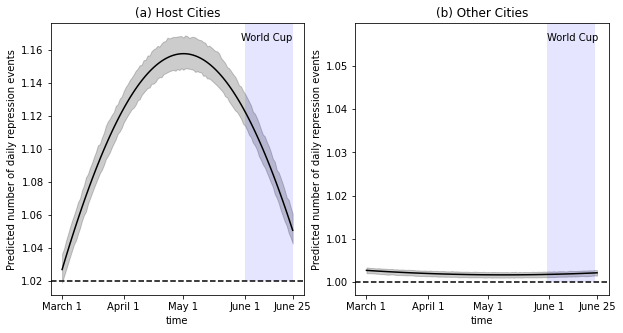

In [2151]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10,5))

# put values for generating the loneplot for model that predicts
a = sns.lineplot(ax = ax[0],data = test_df,x = 'time',y = 'out_log',color='black')
# fix x labels  
x = [0.01, 0.32, 0.62, 0.93, 1.17]
labels = ['March 1','April 1','May 1','June 1','June 25',]
plt.xticks(x, labels)
plt.xlabel('') # None value 
ax[0].set_ylabel('Predicted number of daily repression events')

# Generating World Cup event window
# Source https://datavizpyr.com/how-to-draw-a-rectangle-on-a-plot-in-matplotlib/
# Create the rectangle World Cup 
rect=Rectangle((0.93, 1.02), 0.24, 6, #1.17-0.93
                         #fill=False,
                         alpha=0.1,
                         facecolor="blue")
ax[0].add_patch(rect)
fig.text(0.39, 0.83, r'World Cup')

# specifying horizontal line type
ax[0].axhline(y = 1.02, color = 'black', linestyle = '--')
# set title to the sub plot 
ax[0].set_title('(a) Host Cities')


#####################2nd sub plot 
b= sns.lineplot(ax = ax[1],data = test_df_2,x = 'time',y = 'out_log',color='black')
y = [1,1.01, 1.02,1.03,1.04,1.05]
ax[1].set_yticks(y)
ax[1].set_ylabel('Predicted number of daily repression events')
ax[1].axhline(y = 1, color = 'black', linestyle = '--')
ax[1].set_ylim(0.997,1.06)
rec1=Rectangle((0.92, 1), 0.24, 6, #1.17-0.93
                           #fill=False,
                            alpha=0.1,
                            facecolor="blue")
ax[1].add_patch(rec1)
ax[1].set_title('(b) Other Cities')
fig.text(0.815, 0.83, r'World Cup')

plt.show()

## Enrich plot with initial data - observations 

* first approach plot initial data with models using scatteplot. 

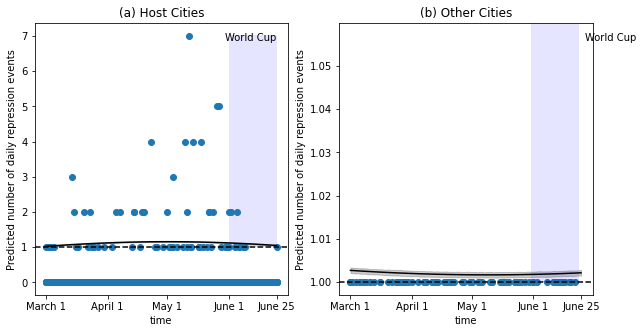

In [2152]:
# enrich with scatter 
enrich_scatter_1 = main[['lnrepression','repression','hostcity','time', 'prewc_time3m']]
enrich_scatter_1 = enrich_scatter_1[(enrich_scatter_1['hostcity']==1)] # filter 
enrich_scatter_1 = enrich_scatter_1.dropna() # drop missifng values if exist
###########################################################################
enrich_scatter_2 = main[['lnrepression','repression','hostcity','time', 'prewc_time3m']]
enrich_scatter_2 = enrich_scatter_2[(enrich_scatter_2['hostcity']==0)]
enrich_scatter_2 = enrich_scatter_2.dropna()
############################################################################
# plot all diagrams together
import seaborn as sns

# fig = plt.figure(figsize=(3, 4))
# plt.figure(figsize=(3, 3))
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10,5))
# fig, ax = plt.subplots()
sns.lineplot(ax = ax[0],data = test_df,x = 'time',y = 'out_log',color='black')
x = [0.01, 0.32, 0.62, 0.93, 1.17]
labels = ['March 1','April 1','May 1','June 1','June 25',]
plt.xticks(x, labels)
plt.xlabel('') # None value 
ax[0].set_ylabel('Predicted number of daily repression events')

# Generating World Cup event window
# Source https://datavizpyr.com/how-to-draw-a-rectangle-on-a-plot-in-matplotlib/
from matplotlib.patches import Rectangle
rect=Rectangle((0.93, 1.02), 0.24, 6, #1.17-0.93
                        #fill=False,
                        alpha=0.1,
                        facecolor="blue")
ax[0].add_patch(rect)
fig.text(0.39, 0.83, r'World Cup')

# specifying horizontal line type
ax[0].axhline(y = 1.02, color = 'black', linestyle = '--')
ax[0].set_title('(a) Host Cities')

# enrich 1  
ax[0].scatter(enrich_scatter_1['time'], enrich_scatter_1['repression'])


#####################2nd 
sns.lineplot(ax = ax[1],data = test_df_2,x = 'time',y = 'out_log',color='black')
y = [1,1.01, 1.02,1.03,1.04,1.05]
ax[1].set_yticks(y)
ax[1].set_ylabel('Predicted number of daily repression events')
ax[1].axhline(y = 1, color = 'black', linestyle = '--')
ax[1].set_ylim(0.997,1.06)
rec1=Rectangle((0.92, 1), 0.24, 6, #1.17-0.93
                          #fill=False,
                           alpha=0.1,
                           facecolor="blue")
# enrich 2
ax[1].scatter(enrich_scatter_2['time'], enrich_scatter_2['repression'])
ax[1].add_patch(rec1)
ax[1].set_title('(b) Other Cities')
fig.text(0.89, 0.83, r'World Cup')

plt.show()

* We observe that our initial data takes distinct values and have been plot to scatterplot. 
* But, our OLS model has been plot to lineplot. 
* Because we find it difficult ot interpret this (as we cannot interpet our hypothesis analyzing the flow of lines) we will plot both initial data and model plot with lineplots. 
    * For this approach we inspired from **Figure 4.** of the paper.

* We will enrich the figure by plottting also relevant informattion from the actual data (**not predictions**).
    * For enrich diagrams we replicate the **figure 4** of main paper so we follow the instruction from replication.do of this section.

* firstly, we will create a datfarame for **hostcity = 1**

In [2153]:
# Figure 4 main 
## add initial observation ycomena for erich sub - question

enrich_1 = main[['lnrepression','repression','hostcity','time', 'prewc_time3m']]
enrich_1 = enrich_1[(enrich_1['hostcity']==1)] # filter 
enrich_1 = enrich_1.dropna(subset=['prewc_time3m']) # drop missifng values if exist 
enrich_1 = enrich_1.sort_values("hostcity")
enrich_1 = enrich_1.sort_values("time")
# group by time 
enrich_1 = enrich_1.groupby(['time']).sum()
enrich_1['mooving_avg'] = enrich_1['repression'].rolling(5).mean() # rolling avd with window 5
enrich_1 # previw data 

,lnrepression,repression,hostcity,prewc_time3m,mooving_avg
time,,,,,
0.01,0.693147,1.0,5.0,5.0,NaN
0.02,0.693147,1.0,5.0,10.0,NaN
0.03,0.693147,1.0,5.0,15.0,NaN
0.04,0.693147,1.0,5.0,20.0,NaN
0.05,0.693147,1.0,5.0,25.0,1.0
...,...,...,...,...,...
1.13,0.000000,0.0,5.0,565.0,0.0
1.14,0.000000,0.0,5.0,570.0,0.0
1.15,0.000000,0.0,5.0,575.0,0.0


* let's plot the diagram with seaborn 

<AxesSubplot: xlabel='time', ylabel='mooving_avg'>

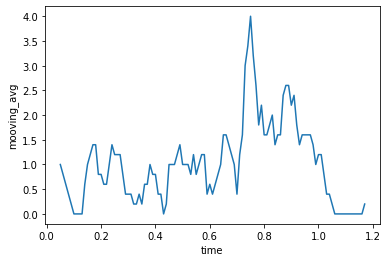

In [2154]:
sns.lineplot(data=enrich_1, x="time", y="mooving_avg")

* In addition, we will create another df for the second subplot for enrich for **hostcity = 0**. 

In [2155]:
# Figure 4 main 
enrich_2 = main[['lnrepression','repression','hostcity','time', 'prewc_time3m']]
enrich_2 = enrich_2[(enrich_2['hostcity']==0)]
enrich_2 = enrich_2.dropna(subset=['prewc_time3m'])
enrich_2 = enrich_2.sort_values("hostcity")
enrich_2 = enrich_2.sort_values("time")
# group by time 
enrich_2 = enrich_2.groupby(['time']).sum()
enrich_2['mooving_avg'] = enrich_2['repression'].rolling(5).mean()

* let's plot the second plot with initial data

<AxesSubplot: xlabel='time', ylabel='mooving_avg'>

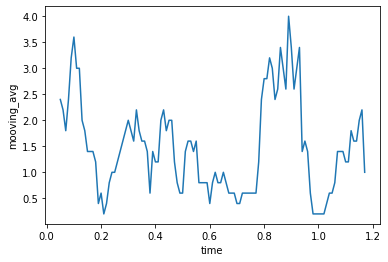

In [2156]:
sns.lineplot(data=enrich_2, x="time", y="mooving_avg")

* Now, we will plot our predictions models with initial data together. 

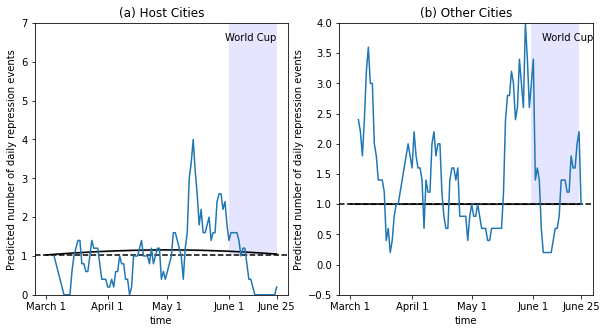

In [2157]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10,5))

###############first plot 
sns.lineplot(ax = ax[0],data = test_df,x = 'time',y = 'out_log',color='black')
x = [0.01, 0.32, 0.62, 0.93, 1.17]
labels = ['March 1','April 1','May 1','June 1','June 25',]
plt.xticks(x, labels)
plt.xlabel('') # None value 
ax[0].set_ylabel('Predicted number of daily repression events')

# Generating World Cup event window
# Source https://datavizpyr.com/how-to-draw-a-rectangle-on-a-plot-in-matplotlib/
from matplotlib.patches import Rectangle
rect=Rectangle((0.93, 1.02), 0.24, 6, #1.17-0.93
                        #fill=False,
                        alpha=0.1,
                        facecolor="blue")
ax[0].add_patch(rect)
fig.text(0.39, 0.83, r'World Cup')

# specifying horizontal line type
ax[0].axhline(y = 1.02, color = 'black', linestyle = '--')
ax[0].set_title('(a) Host Cities')

# enrich 
sns.lineplot(ax=ax[0],data = enrich_1, x = 'time', y = 'mooving_avg')
#####################2nd plot  
sns.lineplot(ax = ax[1],data = test_df_2,x = 'time',y = 'out_log',color='black')
ax[1].set_ylabel('Predicted number of daily repression events')
ax[1].axhline(y = 1, color = 'black', linestyle = '--')
# ax[1].set_ylim(0.997,1.06)
ax[1].set_ylim(-0.5,4)
rec1=Rectangle((0.92, 1), 0.24, 6, #1.17-0.93
                          #fill=False,
                           alpha=0.1,
                           facecolor="blue")
ax[1].add_patch(rec1)
ax[1].set_title('(b) Other Cities')
fig.text(0.83, 0.83, r'World Cup')


ax[0].set_ylim(0, 7)
ax[0].set_ylim(0, 7)

# enrich 
sns.lineplot(ax=ax[1],data = enrich_2, x = 'time', y = 'mooving_avg')

plt.show()

## Interpretation

* we will write down the 2 hypothesis that authors formulate: 
    
* H1: In the run-up to an international sports tournament, state repression spikes in host cities, but not in other cities.

* H2: During an international sports tourna- ment, state repression drops in host cities but remains unchanged in other cities.
-----------------------------------------------------------------------------------------------------------------------
Bearing in mind the hypothesis (H1), (H2) we observed that verified both from initial data (blue lines) and model lines (black continous lines). In more detail: 
   * As far as the first sub plot (a) Host Cities we oberve that verified the (H1) hypothesis that says: In the run-up to an international sports tournament, state repression spikes in host cities, as both inital data (blue line) increases before World Cup and model line (black line) increases, too. In addition, as far as the second hypothesis (H2), during an international sports tournament (after June 1), state repression drops in host cities, which verified again from both initial data plot and model plot if we observe the flow of lines. 
   * As far as the second sub plot (b) Other Cities we observe that 
in the run-up to an international sports tournament, the repression is at low level, which verified from both initial data line and model line (**Note**: for line model it is better to see the plot that we did before combining with initial data to see clearly the flow as in merging plot it looks like a flat-horizontal line). But, during an international sport turnamment repression remains unchanged in other cities. 

* General observation: The logic behind this analysis is tha we check the two hypotnesis and compare them with the folw of both lines (initial data line and model line) for each subplot seperately. 

Note: We oberve that the model runned for ln but we followed a procedure to take out the logarithms as we observed that y axis is not logarithmized so some diffrencies as far as the precision may be as result of this transformation.      

### Q4: Robustness Check Using a Dichotomous Indicator of Repression

* Dataframe for **df_q4**
* We will generate a dataframe using again the ``data/main_data.tab`` that is main df.
* We will specify the columns that we need for our analysis (**usecols** parameter).

In [2158]:
df_q4 = main[["dumrepression", 
                "hostcitytime", "hostcitytime2", "hostcity", 
                "time", "time2", "lnpop_1970", 
                "vote_frejuli", "literacy_avg", "lnrebact1974", 
                "lnrepression70_77", "zone2","zone3","zone4","zone5"]]
df_q4

,dumrepression,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5
0,0.0,NaN,NaN,0.0,NaN,NaN,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
1,0.0,NaN,NaN,0.0,NaN,NaN,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
2,0.0,NaN,NaN,0.0,NaN,NaN,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
3,0.0,NaN,NaN,0.0,NaN,NaN,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
4,0.0,NaN,NaN,0.0,NaN,NaN,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0
133728,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0
133729,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0
133730,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0


* We will follow instruction from ``replication.do`` line **261** to create the models. 

``* Model 1: logit dumrepression hostcitytime hostcitytime2 hostcity time time2, robust``

In [2159]:
model_1 = logit("dumrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2", data=df_q4)
m1 = model_1.fit(cov_type="HC1")
m1.summary()

Optimization terminated successfully.
         Current function value: 0.019190
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                58107
Model:                          Logit   Df Residuals:                    58101
Method:                           MLE   Df Model:                            5
Date:                Mon, 19 Dec 2022   Pseudo R-squ.:                  0.1533
Time:                        15:36:54   Log-Likelihood:                -1115.1
converged:                       True   LL-Null:                       -1317.0
Covariance Type:                  HC1   LLR p-value:                 4.467e-85
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -5.8507      0.267    -21.934      0.000      -6.373      -5.328
hostcitytime      4.1403      2.081      1.990      0.047       0.062       8.219
hostcitytime2    -3.2143      1.600     -2.009      0.045      -6.350      -0.078
hostcity          3.1376      0.576      5.448      0.000       2.009       4.266
time             -0.8733      1.067     -0.818      0.413      -2.966       1.219
time2             0.5355      0.864      0.620      0.535      -1.157       2.228
=================================================================================
"""

## Prepare values for the column **(1)**

* Before replicating model 2 we will hold the data-values so that we can replicate the given table. 

In [2160]:
list_coefs_copy_m1 = m1.params.tolist() # coef ++ intercepts 
list_std_copy_m1 = m1.bse.tolist() # std 

In [2161]:
# format round digit 
list_stdm1 = [round(item,3) for item in list_std_copy_m1]
list_coefs_m1 = [round(item,3) for item in list_coefs_copy_m1]

In [2162]:
# format parenthesis 
list_std_m1 = []
for i in list_stdm1: list_std_m1.append('(' + str(i) + ')')

In [2163]:
# insert coef to the correct order 
list_coefs_m1.pop(0)
list_coefs_m1.insert(len(list_coefs_m1), -5.850653444463529)
# incert std intercept to the correct order  
list_std_m1.pop(0)
list_std_m1.insert(len(list_std_m1), 0.266733376021642) # value of intercept in the correct order

In [2164]:
# create-union fixed values for the first column 
list_final_m1 = [] 
std_1 = 0
for coef_3 in list_coefs_m1:
    list_final_m1.append(coef_3)
    list_final_m1.append(list_std_m1[std_1])
    std_1 = std_1 + 1

In [2165]:
# extra calculation for wald x**2
# Or can do test all join equal 0
x_vars = m1.summary2().tables[1].index
m1.wald_test_terms()
# To replicate what wald_test_terms is doing yourself
all_zero = [x + '= 0' for x in x_vars[1:]]
m1.wald_test(','.join(all_zero))

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[712.20480345]], p-value=1.1278365642201998e-151, df_denom=5>

In [2166]:
## add extra values 
list_final_m1.append('x')# controls 
list_final_m1.append('x')# zonefixed 
list_final_m1.append(712.20)# wald x**2 
list_final_m1.append(0.1533)# psudo rsquared
list_final_m1.append("")# F-Statistic
list_final_m1.append("")# R**2
list_final_m1.append(58107)# observations 

``*Model 2: logit dumrepression hostcitytime hostcitytime2 hostcity time time2 lnpop_1970 vote_frejuli literacy_avg lnrebact1974 lnrepression70_77, robust``

In [2167]:
model_2 = logit("dumrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77", data=df_q4)
m2 = model_2.fit(cov_type="HC1")
m2.summary()

Optimization terminated successfully.
         Current function value: 0.013826
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                56394
Model:                          Logit   Df Residuals:                    56383
Method:                           MLE   Df Model:                           10
Date:                Mon, 19 Dec 2022   Pseudo R-squ.:                  0.4027
Time:                        15:36:55   Log-Likelihood:                -779.73
converged:                       True   LL-Null:                       -1305.4
Covariance Type:                  HC1   LLR p-value:                1.601e-219
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -17.2479      3.181     -5.422      0.000     -23.482     -11.013
hostcitytime          4.8685      2.119      2.297      0.022       0.715       9.023
hostcitytime2        -3.7977      1.647     -2.305      0.021      -7.026      -0.569
hostcity             -1.6274      0.628     -2.591      0.010      -2.859      -0.396
time                 -0.9927      1.088     -0.912      0.362      -3.126       1.140
time2                 0.6181      0.882      0.701      0.484      -1.111       2.347
lnpop_1970            0.8683      0.224      3.875      0.000       0.429       1.308
vote_frejuli          0.0061      0.014      0.450      0.653      -0.020       0.033
literacy_avg         -0.2055      3.172     -0.065      0.948      -6.422       6.011
lnrebact1974          0.0486      0.078      0.626      0.531      -0.104       0.201
lnrepression70_77     0.5776      0.141      4.100      0.000       0.301       0.854
=====================================================================================

Possibly complete quasi-separation: A fraction 0.33 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

* Before replicating model 3 we will hold the data-values so that we can replicate the given table. 

In [2168]:
list_coefs_copy_m2 = m2.params.tolist() # coef ++ intercept
list_std_copy_m2 = m2.bse.tolist() # std

In [2169]:
# format round digit 
list_stdm2 = [round(item,3) for item in list_std_copy_m2]
list_coefs_m2 = [round(item,3) for item in list_coefs_copy_m2]

In [2170]:
# format parenthesis 
list_std_m2 = []
for i in list_stdm2: list_std_m2.append('(' + str(i) + ')')

* **Note**: We will **remove** some extra columns (coefs) that no used to the given Table.

In [2171]:
# remove 4 last values zone2-5
list_coefs_m2.pop(-1)
list_coefs_m2.pop(-1)
list_coefs_m2.pop(-1)
list_coefs_m2.pop(-1)
list_coefs_m2.pop(-1)
# remove for sts . . .
list_std_m2.pop(-1)
list_std_m2.pop(-1)
list_std_m2.pop(-1)
list_std_m2.pop(-1)
list_std_m2.pop(-1)

'(0.224)'

In [2172]:
# insert coef to the correct order 
list_coefs_m2.pop(0)
list_coefs_m2.insert(len(list_coefs_m2), -17.247855951734568)
# incert std intercept to the correct order  
list_std_m2.pop(0)
list_std_m2.insert(len(list_std_m2), 3.180979118964071) # value of intercept in the correct order

In [2173]:
# create-union fixed values for the first column 
list_final_m2 = [] 
std_2 = 0
for coef_3 in list_coefs_m2:
    list_final_m2.append(coef_3)
    list_final_m2.append(list_std_m2[std_2])
    std_2 = std_2 + 1

In [2174]:
# extra calculation for wald x**2
# Or can do test all join equal 0
x_vars = m2.summary2().tables[1].index
m2.wald_test_terms()
# To replicate what wald_test_terms is doing yourself
all_zero = [x + '= 0' for x in x_vars[1:]]
m2.wald_test(','.join(all_zero))

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[637.2237871]], p-value=1.8489231619969343e-130, df_denom=10>

In [2175]:
## add extra values 
list_final_m2.append('Yes')# controls 
list_final_m2.append('x')# zonefixed 
list_final_m2.append(637.22)# wald x**2
list_final_m2.append(0.4027)# psudo rsquared
list_final_m2.append("")# F-Statistic
list_final_m2.append("")# R**2
list_final_m2.append(56394)# observations 

``*Model 3: logit dumrepression hostcitytime hostcitytime2 hostcity time time2 lnpop_1970 vote_frejuli literacy_avg lnrebact1974 lnrepression70_77 zone2-zone5, robust``

In [2176]:
model_3 = logit("dumrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 + zone2 + zone3 + zone4 + zone5", data=df_q4)
m3 = model_3.fit(cov_type="HC1")
m3.summary()

Optimization terminated successfully.
         Current function value: 0.013570
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                56394
Model:                          Logit   Df Residuals:                    56379
Method:                           MLE   Df Model:                           14
Date:                Mon, 19 Dec 2022   Pseudo R-squ.:                  0.4138
Time:                        15:36:56   Log-Likelihood:                -765.25
converged:                       True   LL-Null:                       -1305.4
Covariance Type:                  HC1   LLR p-value:                9.017e-222
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -15.4018      3.161     -4.873      0.000     -21.597      -9.207
hostcitytime          5.3781      2.267      2.373      0.018       0.935       9.821
hostcitytime2        -4.2173      1.774     -2.378      0.017      -7.694      -0.741
hostcity             -1.3273      0.690     -1.924      0.054      -2.679       0.025
time                 -0.9924      1.086     -0.914      0.361      -3.121       1.136
time2                 0.6179      0.880      0.702      0.483      -1.107       2.343
lnpop_1970            0.7459      0.215      3.470      0.001       0.325       1.167
vote_frejuli          0.0200      0.015      1.323      0.186      -0.010       0.050
literacy_avg         -0.1268      3.041     -0.042      0.967      -6.088       5.834
lnrebact1974         -0.1315      0.080     -1.635      0.102      -0.289       0.026
lnrepression70_77     0.5452      0.155      3.519      0.000       0.242       0.849
zone2                -1.9991      0.450     -4.445      0.000      -2.881      -1.118
zone3                -0.9832      0.272     -3.610      0.000      -1.517      -0.449
zone4                -0.1626      0.260     -0.625      0.532      -0.673       0.347
zone5                -0.7864      0.485     -1.623      0.105      -1.736       0.163
=====================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

* Before replicating model 4 we will hold the data-values so that we ca nreplicate the given table. 

In [2177]:
list_coefs_copy_m3 = m3.params.tolist() # coef ++ intercepts 
list_std_copy_m3 = m3.bse.tolist() # std

# format round digit 
list_stdm3 = [round(item,3) for item in list_std_copy_m3]
list_coefs_m3 = [round(item,3) for item in list_coefs_copy_m3]
# format parenthesis 
list_std_m3 = []
for i in list_stdm3: list_std_m3.append('(' + str(i) + ')')

* **Note**: We will **remove** some extra columns (coefs) that no used to the given Table.

In [2178]:
# remove 4 last values zone2-5
list_coefs_m3.pop(-1)
list_coefs_m3.pop(-1)
list_coefs_m3.pop(-1)
list_coefs_m3.pop(-1)
list_coefs_m3.pop(-1)
list_coefs_m3.pop(-1)
list_coefs_m3.pop(-1)
list_coefs_m3.pop(-1)
list_coefs_m3.pop(-1)
# remove for sts . . .
list_std_m3.pop(-1)
list_std_m3.pop(-1)
list_std_m3.pop(-1)
list_std_m3.pop(-1)
list_std_m3.pop(-1)
list_std_m3.pop(-1)
list_std_m3.pop(-1)
list_std_m3.pop(-1)
list_std_m3.pop(-1)

'(0.215)'

In [2179]:
# insert coef to the correct order 
list_coefs_m3.pop(0)
list_coefs_m3.insert(len(list_coefs_m3), -15.401845872047373)
# incert std intercept to the correct order  
list_std_m3.pop(0)
list_std_m3.insert(len(list_std_m3), 3.1606438641156602) # value of intercept in the correct order

In [2180]:
# create-union fixed values for the first column 
list_final_m3 = [] 
std_3 = 0
for coef_3 in list_coefs_m3:
    list_final_m3.append(coef_3)
    list_final_m3.append(list_std_m3[std_3])
    std_3 = std_3 + 1

In [2181]:
# Or can do test all join equal 0
x_vars = m3.summary2().tables[1].index
m3.wald_test_terms()
# To replicate what wald_test_terms is doing yourself
all_zero = [x + '= 0' for x in x_vars[1:]]
m3.wald_test(','.join(all_zero))

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[791.3102331]], p-value=7.98644850805335e-160, df_denom=14>

In [2182]:
## add extra values 
list_final_m3.append('Yes')# controls 
list_final_m3.append('YES')# zonefixed 
list_final_m3.append(791.31)# wald x**2
list_final_m3.append(0.4138)# psudo rsquared
list_final_m3.append("")# F-Statistic
list_final_m3.append("")# R**2
list_final_m3.append(56394)# observations 

``*Model 4: reg dumrepression hostcitytime hostcitytime2 hostcity time time2, robust``

In [2183]:
m4 = smf.ols("dumrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2", data=df_q4)
m4 = m4.fit(cov_type="HC1")
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dumrepression   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     15.66
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           1.95e-15
Time:                        15:36:56   Log-Likelihood:                 84143.
No. Observations:               58107   AIC:                        -1.683e+05
Df Residuals:                   58101   BIC:                        -1.682e+05
Df Model:                           5                                         
Covariance Type:                  HC1                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0028      0.001      4.137      0.000       0.001       0.004
hostcitytime      0.3184      0.158      2.017      0.044       0.009       0.628
hostcitytime2    -0.2616      0.121     -2.160      0.031      -0.499      -0.024
hostcity          0.0505      0.041      1.247      0.213      -0.029       0.130
time             -0.0021      0.003     -0.808      0.419      -0.007       0.003
time2             0.0013      0.002      0.637      0.524      -0.003       0.005
==============================================================================
Omnibus:                   114009.579   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        181595523.133
Skew:                          16.100   Prob(JB):                         0.00
Kurtosis:                     274.970   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

* Before replicating model 5 we will hold the data-values so that we ca nreplicate the given table. 

In [2184]:
list_coefs_copy_m4 = m4.params.tolist() # coef ++ intercepts 
list_std_copy_m4 = m4.bse.tolist() # std

# format round digit 
list_stdm4 = [round(item,3) for item in list_std_copy_m4]
list_coefs_m4 = [round(item,3) for item in list_coefs_copy_m4]
# format parenthesis 
list_std_m4 = []
for i in list_stdm4: list_std_m4.append('(' + str(i) + ')')

In [2185]:
# insert coef to the correct order 
list_coefs_m4.pop(0)
list_coefs_m4.insert(len(list_coefs_m4), 0.002833071572413559)
# incert std intercept to the correct order  
list_std_m4.pop(0)
list_std_m4.insert(len(list_std_m4), 0.0006847905742705044) # value of intercept in the correct order

In [2186]:
# create-union fixed values for the first column 
list_final_m4 = [] 
std_4 = 0
for coef_3 in list_coefs_m4:
    list_final_m4.append(coef_3)
    list_final_m4.append(list_std_m4[std_4])
    std_4 = std_4 + 1

In [2187]:
## add extra values 
list_final_m4.append('x')# controls 
list_final_m4.append('x')# zonefixed
list_final_m4.append("")# wald x**2
list_final_m4.append("")# psudo rsquared
list_final_m4.append(15.66)# F-Statistic
list_final_m4.append(0.043)# R**2
list_final_m4.append(58107)# observations 

``*Model 5: reg dumrepression hostcitytime hostcitytime2 hostcity time time2 lnpop_1970 vote_frejuli literacy_avg lnrebact1974 lnrepression70_77, robust``

In [2188]:
m5 = smf.ols("dumrepression ~  hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77", data=df_q4)
m5 = m5.fit(cov_type="HC1")
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dumrepression   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     19.78
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           5.57e-37
Time:                        15:36:56   Log-Likelihood:                 81421.
No. Observations:               56394   AIC:                        -1.628e+05
Df Residuals:                   56383   BIC:                        -1.627e+05
Df Model:                          10                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0053      0.002     -2.406      0.016      -0.010      -0.001
hostcitytime          0.3186      0.156      2.036      0.042       0.012       0.625
hostcitytime2        -0.2617      0.120     -2.180      0.029      -0.497      -0.026
hostcity              0.0219      0.040      0.547      0.584      -0.057       0.100
time                 -0.0023      0.003     -0.886      0.376      -0.007       0.003
time2                 0.0014      0.002      0.707      0.480      -0.003       0.005
lnpop_1970            0.0012      0.000      5.808      0.000       0.001       0.002
vote_frejuli      -4.456e-05   1.96e-05     -2.275      0.023    -8.3e-05   -6.17e-06
literacy_avg         -0.0066      0.001     -5.258      0.000      -0.009      -0.004
lnrebact1974         -0.0002      0.000     -1.260      0.208      -0.000    9.86e-05
lnrepression70_77     0.0048      0.000     11.305      0.000       0.004       0.006
==============================================================================
Omnibus:                   108642.238   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        155981025.969
Skew:                          15.483   Prob(JB):                         0.00
Kurtosis:                     258.779   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Before replicating model 6 we will hold the data-values so that we ca nreplicate the given table. 

In [2189]:
list_coefs_copy_m5 = m5.params.tolist() # coef ++ intercepts 
list_std_copy_m5 = m5.bse.tolist() # std

# format round digit 
list_stdm5 = [round(item,3) for item in list_std_copy_m5]
list_coefs_m5 = [round(item,3) for item in list_coefs_copy_m5]
# format parenthesis 
list_std_m5 = []
for i in list_stdm5: list_std_m5.append('(' + str(i) + ')')

In [2190]:
# remove 4 last values zone2-5
list_coefs_m5.pop(-1)
list_coefs_m5.pop(-1)
list_coefs_m5.pop(-1)
list_coefs_m5.pop(-1)
list_coefs_m5.pop(-1)
# remove for sts . . .
list_std_m5.pop(-1)
list_std_m5.pop(-1)
list_std_m5.pop(-1)
list_std_m5.pop(-1)
list_std_m5.pop(-1)

'(0.0)'

In [2191]:
# insert coef to the correct order 
list_coefs_m5.pop(0)
list_coefs_m5.insert(len(list_coefs_m5), -0.005300386361818024)
# incert stdintercept to the correct order  
list_std_m5.pop(0)
list_std_m5.insert(len(list_std_m5), 0.0022029731965740123,) # value of intercept in the correct order

In [2192]:
# create-union fixed values for the first column 
list_final_m5 = [] 
std_5 = 0
for coef_3 in list_coefs_m5:
    list_final_m5.append(coef_3)
    list_final_m5.append(list_std_m5[std_5])
    std_5 = std_5 + 1

In [2193]:
## add extra values
list_final_m5.append('Yes')# controls
list_final_m5.append('x')# zonefixed 
list_final_m5.append("")# wald x**2
list_final_m5.append("")# psudo rsquared
list_final_m5.append(19.78)# F-Statistic
list_final_m5.append(0.058)# R**2
list_final_m5.append(56394)# observations  

``*Model 6: reg dumrepression hostcitytime hostcitytime2 hostcity time time2 lnpop_1970 vote_frejuli literacy_avg lnrebact1974 lnrepression70_77 zone2-zone5, robust``

In [2194]:
m6 = smf.ols("dumrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 + zone2 + zone3 + zone4 + zone5", data=df_q4)
m6 = m6.fit(cov_type="HC1")
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dumrepression   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     14.45
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           2.15e-35
Time:                        15:36:56   Log-Likelihood:                 81565.
No. Observations:               56394   AIC:                        -1.631e+05
Df Residuals:                   56379   BIC:                        -1.630e+05
Df Model:                          14                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0050      0.003     -1.880      0.060      -0.010       0.000
hostcitytime          0.3186      0.155      2.055      0.040       0.015       0.623
hostcitytime2        -0.2617      0.119     -2.199      0.028      -0.495      -0.028
hostcity              0.0219      0.040      0.552      0.581      -0.056       0.100
time                 -0.0023      0.003     -0.885      0.376      -0.007       0.003
time2                 0.0014      0.002      0.707      0.480      -0.003       0.005
lnpop_1970            0.0038      0.000      9.167      0.000       0.003       0.005
vote_frejuli      -1.441e-06   2.68e-05     -0.054      0.957    -5.4e-05    5.11e-05
literacy_avg         -0.0266      0.003     -9.846      0.000      -0.032      -0.021
lnrebact1974         -0.0016      0.000     -7.784      0.000      -0.002      -0.001
lnrepression70_77     0.0037      0.000      8.776      0.000       0.003       0.005
zone2                -0.0165      0.002    -10.425      0.000      -0.020      -0.013
zone3                -0.0129      0.001     -9.585      0.000      -0.016      -0.010
zone4                -0.0071      0.005     -1.509      0.131      -0.016       0.002
zone5                -0.0102      0.001     -9.862      0.000      -0.012      -0.008
==============================================================================
Omnibus:                   108296.025   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        153317250.667
Skew:                          15.376   Prob(JB):                         0.00
Kurtosis:                     256.580   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Having run the 6 models (3: logit, 3:OLS), let's replicate the given table **SI.4.5.** of paper.

In [2195]:
list_coefs_copy_m6 = m6.params.tolist() # coef ++ intercepts 
list_std_copy_m6 = m6.bse.tolist() # std

# format round digit 
list_stdm6 = [round(item,3) for item in list_std_copy_m6]
list_coefs_m6 = [round(item,3) for item in list_coefs_copy_m6]
# format parenthesis 
list_std_m6 = []
for i in list_stdm6: list_std_m6.append('(' + str(i) + ')')

In [2196]:
# remove 4 last values zone2-5
list_coefs_m6.pop(-1)
list_coefs_m6.pop(-1)
list_coefs_m6.pop(-1)
list_coefs_m6.pop(-1)
list_coefs_m6.pop(-1)
list_coefs_m6.pop(-1)
list_coefs_m6.pop(-1)
list_coefs_m6.pop(-1)
list_coefs_m6.pop(-1)
# remove for sts . . .
list_std_m6.pop(-1)
list_std_m6.pop(-1)
list_std_m6.pop(-1)
list_std_m6.pop(-1)
list_std_m6.pop(-1)
list_std_m6.pop(-1)
list_std_m6.pop(-1)
list_std_m6.pop(-1)
list_std_m6.pop(-1)

'(0.0)'

In [2197]:
# insert coef to the correct order 
list_coefs_m6.pop(0)
list_coefs_m6.insert(len(list_coefs_m6), -0.0050113199784436535)
# incert stdintercept to the correct order  
list_std_m6.pop(0)
list_std_m6.insert(len(list_std_m6), 0.002665179421963492) # value of intercept in the correct order

In [2198]:
# create-union fixed values for the first column 
list_final_m6 = [] 
std_6 = 0
for coef_3 in list_coefs_m6:
    list_final_m6.append(coef_3)
    list_final_m6.append(list_std_m6[std_6])
    std_6 = std_6 + 1

In [2199]:
## add extra values 
list_final_m6.append('YES')# controls
list_final_m6.append('YES')# zonefixed 
list_final_m6.append("")# wald
list_final_m6.append("")# psudo rsquared
list_final_m6.append(14.45)# F statistic 
list_final_m6.append(0.0063)# r**2
list_final_m6.append(56394)# observations  

* Having done the preprocess we can replicate the table **SI.4.5**.

## Replicate Table

In [2200]:
# create dataframe with index and columns and values suitable 
df = pd.DataFrame(
   {
      "(1)": [i for i in list_final_m1], # only values for model1 series: coefficient && std
      "(2)": [j for j in list_final_m2], ## only values for model2 series: coefficient && std
      "(3)": [k for k in list_final_m3], # # only values for model3 series: coefficient && std
      "(4)": [i for i in list_final_m4],
       "(5)":[i for i in list_final_m5],
       "(6)":[i for i in list_final_m6],
   },
    # index values names of Table we want to replicate 
   index=[
           'Host City x Time', ' ',
            'Host City x $Time^2$', ' ',
            'Host City', ' ',
            'Time', ' ',
            '$Time^2$', ' ',
            'Constant',' ',
             'Controls',
            'Zone fixed effects',
            'Wald $x^2$',
            'Rseudo $R^2$',
             'F Statistic',
            '$R^2$',
            'Observations',
                     ]
)

In [2201]:
print('Table SI.4.5. Regression results for binary variable of repression')
# print('----------------------------------------------------------------------')
print(' '*35 + 'Logit' +  '|' +' '*20 + 'OLS')
print('-------------------------------------------------------------------------')
df

Table SI.4.5. Regression results for binary variable of repression
                                   Logit|                    OLS
-------------------------------------------------------------------------


,(1),(2),(3),(4),(5),(6)
Host City x Time,4.14,4.869,5.378,0.318,0.319,0.319
,(2.081),(2.119),(2.267),(0.158),(0.156),(0.155)
Host City x $Time^2$,-3.214,-3.798,-4.217,-0.262,-0.262,-0.262
,(1.6),(1.647),(1.774),(0.121),(0.12),(0.119)
Host City,3.138,-1.627,-1.327,0.051,0.022,0.022
,(0.576),(0.628),(0.69),(0.041),(0.04),(0.04)
Time,-0.873,-0.993,-0.992,-0.002,-0.002,-0.002
,(1.067),(1.088),(1.086),(0.003),(0.003),(0.003)
$Time^2$,0.535,0.618,0.618,0.001,0.001,0.001
,(0.864),(0.882),(0.88),(0.002),(0.002),(0.002)


### Q5: Robustness Check Using Matched Samples

* Firstly, we will use data again from ``data\main_data.tab`` file that is the df main.

In [2202]:
df_q5 = main
df_q5

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
1,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
2,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
3,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
4,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133728,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133729,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133730,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN


* We will specify the columns we will need. 

In [2203]:
df_q5 = df_q5[['lnrepression','hostcitytime','hostcitytime2','hostcity',
         'time','time2','lnpop_1970','literacy_avg','vote_frejuli',
         'lnrebact1974','lnrepression70_77','zone2','zone3','zone4',
         'zone5','matched_simple']]
df_q5 # let's preview the df 

,lnrepression,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,literacy_avg,vote_frejuli,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,matched_simple
0,0.0,NaN,NaN,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1,NaN
1,0.0,NaN,NaN,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1,NaN
2,0.0,NaN,NaN,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1,NaN
3,0.0,NaN,NaN,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1,NaN
4,0.0,NaN,NaN,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN
133728,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN
133729,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN
133730,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN


* We will filter the data, where **mathed_simple** == **1**, we understand it from the instruction of replication.do (**Table SI.4.7: Linear regressions (OLS) for matched sample**) as for each model it is said (**matched_simple==1**).

In [2204]:
df_q5 = df_q5[df_q5['matched_simple']==1]
df_q5

,lnrepression,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,literacy_avg,vote_frejuli,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,matched_simple
804,0.0,NaN,NaN,0.0,NaN,NaN,12.409082,0.795165,61.9,5.036952,4.276666,0,0,0,0,1.0
805,0.0,NaN,NaN,0.0,NaN,NaN,12.409082,0.795165,61.9,5.036952,4.276666,0,0,0,0,1.0
806,0.0,NaN,NaN,0.0,NaN,NaN,12.409082,0.795165,61.9,5.036952,4.276666,0,0,0,0,1.0
807,0.0,NaN,NaN,0.0,NaN,NaN,12.409082,0.795165,61.9,5.036952,4.276666,0,0,0,0,1.0
808,0.0,NaN,NaN,0.0,NaN,NaN,12.409082,0.795165,61.9,5.036952,4.276666,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129707,0.0,NaN,NaN,0.0,NaN,NaN,12.695291,0.812594,64.1,2.833213,5.886104,0,1,0,0,1.0
129708,0.0,NaN,NaN,0.0,NaN,NaN,12.695291,0.812594,64.1,2.833213,5.886104,0,1,0,0,1.0
129709,0.0,NaN,NaN,0.0,NaN,NaN,12.695291,0.812594,64.1,2.833213,5.886104,0,1,0,0,1.0
129710,0.0,NaN,NaN,0.0,NaN,NaN,12.695291,0.812594,64.1,2.833213,5.886104,0,1,0,0,1.0


* We will run some models based on the instructions of ``replication.do`` line **318** so that we can replicate the Table SI.4.7.
    * We will run only the models based on **Manual matching** tah tis (1), (2), (3).

``*Model 1: reg lnrepression hostcitytime hostcitytime2 hostcity time time2 if matched_simple==1, robust``

In [2205]:
model1 = smf.ols("lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2", data=df_q5)
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit.html
model1_res_ml = model1.fit(cov_type="HC1")

model1_res_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     8.554
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           4.53e-08
Time:                        15:36:57   Log-Likelihood:                 1250.8
No. Observations:                4095   AIC:                            -2490.
Df Residuals:                    4089   BIC:                            -2452.
Df Model:                           5                                         
Covariance Type:                  HC1                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0292      0.008      3.446      0.001       0.013       0.046
hostcitytime      0.4239      0.148      2.868      0.004       0.134       0.714
hostcitytime2    -0.3405      0.113     -3.005      0.003      -0.563      -0.118
hostcity         -0.0064      0.035     -0.182      0.856      -0.075       0.063
time             -0.0255      0.031     -0.810      0.418      -0.087       0.036
time2             0.0196      0.025      0.785      0.433      -0.029       0.068
==============================================================================
Omnibus:                     4313.416   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218155.116
Skew:                           5.436   Prob(JB):                         0.00
Kurtosis:                      37.064   Cond. No.                         58.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

* Prepare values for column (1)
    * We will follow the similar logic taht we followed for replicating **Table SI.4.5.** for the question **Q4**.

In [2206]:
list_coefs_model_copy_1 = model1_res_ml.params.tolist() # coef ++ intercepts 
list_std_model_copy_1 = model1_res_ml.bse.tolist() # std 

In [2207]:
# fromat round digit (3 digits)
list_coefs_model_1 = [round(item, 3) for item in list_coefs_model_copy_1]
list_std_model1 = [round(item, 3) for item in list_std_model_copy_1]

In [2208]:
# format parenthesis 
list_std_model_1 = []
for i in list_std_model1:
    list_std_model_1.append('(' + str(i) + ')')

In [2209]:
# for i in range(9):list_coefs_model_1.append(" ") # missing values coeff
# for i in range(9):list_std_model_1.append(" ") # missing values std 

In [2210]:
# insert coef to the correct order 
list_coefs_model_1.pop(0)
list_coefs_model_1.insert(len(list_coefs_model_1), 0.029)
# incert std intercept to teh correct order  
list_std_model_1.pop(0)
list_std_model_1.insert(len(list_std_model_1), 0.008) # value of intercept in the correct order

In [2211]:
# create-union fixed values for the first column 
list_final_lodel_1 = [] 
std_1 = 0
for coef_3 in list_coefs_model_1:
    list_final_lodel_1.append(coef_3)
    list_final_lodel_1.append(list_std_model_1[std_1])
    std_1 = std_1 + 1

In [2212]:
## add extra values 
list_final_lodel_1.append('x')#controls
list_final_lodel_1.append('x')# zonefixed 
list_final_lodel_1.append(8.554)# Fstatistic 
list_final_lodel_1.append(0.033)# Rsquared  
list_final_lodel_1.append(4095)# observations 


``*Model 2: reg lnrepression hostcitytime hostcitytime2 hostcity time time2 lnpop_1970 vote_frejuli literacy_avg lnrebact1974 lnrepression70_77 if matched_simple==1, robust``

In [2213]:
model2 = smf.ols("lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 +lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77", data=df_q5)
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit.html
model2_res_ml = model2.fit(cov_type="HC1")

model2_res_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     12.90
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           1.82e-22
Time:                        15:36:57   Log-Likelihood:                 1394.7
No. Observations:                4095   AIC:                            -2767.
Df Residuals:                    4084   BIC:                            -2698.
Df Model:                          10                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9371      0.141     -6.668      0.000      -1.213      -0.662
hostcitytime          0.4239      0.135      3.132      0.002       0.159       0.689
hostcitytime2        -0.3405      0.105     -3.250      0.001      -0.546      -0.135
hostcity             -0.1001      0.035     -2.896      0.004      -0.168      -0.032
time                 -0.0255      0.031     -0.817      0.414      -0.087       0.036
time2                 0.0196      0.025      0.789      0.430      -0.029       0.068
lnpop_1970            0.0867      0.011      8.218      0.000       0.066       0.107
vote_frejuli         -0.0014      0.001     -2.732      0.006      -0.002      -0.000
literacy_avg          0.0089      0.087      0.102      0.919      -0.162       0.180
lnrebact1974         -0.0049      0.002     -2.790      0.005      -0.008      -0.001
lnrepression70_77    -0.0029      0.002     -1.296      0.195      -0.007       0.002
==============================================================================
Omnibus:                     4103.436   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186868.735
Skew:                           5.032   Prob(JB):                         0.00
Kurtosis:                      34.527   Cond. No.                     3.74e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 3.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* prepare values for column (2)

In [2214]:
list_coefs_model_copy_2 = model2_res_ml.params.tolist() # coef ++ intercepts 
list_std_model_copy_2 = model2_res_ml.bse.tolist() # std 

In [2215]:
# fromat round digit (3 digits)
list_coefs_model_2 = [round(item, 3) for item in list_coefs_model_copy_2]
list_std_model2 = [round(item, 3) for item in list_std_model_copy_2]

In [2216]:
# format parenthesis 
list_std_model_2 = []
for i in list_std_model2:
    list_std_model_2.append('(' + str(i) + ')')

In [2217]:
# for i in range(4):list_coefs_model_2.append(" ") # missing values coeff
# for i in range(4):list_std_model_2.append(" ") # missing values std 

In [2218]:
list_coefs_model_2.pop(-1)
list_coefs_model_2.pop(-1)
list_coefs_model_2.pop(-1)
list_coefs_model_2.pop(-1)
list_coefs_model_2.pop(-1)
list_std_model_2.pop(-1)
list_std_model_2.pop(-1)
list_std_model_2.pop(-1)
list_std_model_2.pop(-1)
list_std_model_2.pop(-1)

'(0.011)'

In [2219]:
# insert coef to the correct order 
list_coefs_model_2.pop(0)
list_coefs_model_2.insert(len(list_coefs_model_2), -0.937)
# incert std intercept to teh correct order  
list_std_model_2.pop(0)
list_std_model_2.insert(len(list_std_model_2), 0.141) # value of intercept in the correct order

In [2220]:
# create-union fixed values for the first column 
list_final_lodel_2 = [] 
std_2 = 0
for coef_3 in list_coefs_model_2:
    list_final_lodel_2.append(coef_3)
    list_final_lodel_2.append(list_std_model_2[std_2])
    std_2 = std_2 + 1

In [2221]:
## add extra values 
list_final_lodel_2.append('Yes')# controls
list_final_lodel_2.append('x')# zonefixed 
list_final_lodel_2.append(12.90)# Fstatistic 
list_final_lodel_2.append(0.10)# Rsquared  
list_final_lodel_2.append(4095)# observations 

``*Model 3: reg lnrepression hostcitytime hostcitytime2 hostcity time time2 lnpop_1970 vote_frejuli literacy_avg lnrebact1974 lnrepression70_77 zone2-zone5 if matched_simple==1, robust``

In [2222]:
model3 = smf.ols("lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 +lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 + zone2 + zone3 + zone4 + zone5", data=df_q5)
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit.html
model3_res_ml = model3.fit(cov_type="HC1")

model3_res_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     10.48
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           9.72e-24
Time:                        15:36:57   Log-Likelihood:                 1444.5
No. Observations:                4095   AIC:                            -2859.
Df Residuals:                    4080   BIC:                            -2764.
Df Model:                          14                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9783      0.172     -5.701      0.000      -1.315      -0.642
hostcitytime          0.4239      0.131      3.241      0.001       0.168       0.680
hostcitytime2        -0.3405      0.102     -3.344      0.001      -0.540      -0.141
hostcity             -0.0766      0.033     -2.347      0.019      -0.141      -0.013
time                 -0.0255      0.031     -0.818      0.413      -0.087       0.036
time2                 0.0196      0.025      0.789      0.430      -0.029       0.068
lnpop_1970            0.0872      0.011      7.761      0.000       0.065       0.109
vote_frejuli         -0.0009      0.001     -1.575      0.115      -0.002       0.000
literacy_avg          0.2092      0.102      2.045      0.041       0.009       0.410
lnrebact1974         -0.0204      0.003     -6.641      0.000      -0.026      -0.014
lnrepression70_77    -0.0160      0.004     -4.168      0.000      -0.024      -0.008
zone2                -0.1095      0.013     -8.699      0.000      -0.134      -0.085
zone3                -0.0857      0.011     -7.639      0.000      -0.108      -0.064
zone4                -0.0162      0.009     -1.854      0.064      -0.033       0.001
zone5                -0.0682      0.010     -6.635      0.000      -0.088      -0.048
==============================================================================
Omnibus:                     4026.867   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           177134.357
Skew:                           4.887   Prob(JB):                         0.00
Kurtosis:                      33.702   Cond. No.                     4.15e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Prepare values for column (3)

In [2223]:
list_coefs_model_copy_3 = model3_res_ml.params.tolist() # coef ++ intercepts 
list_std_model_copy_3 = model3_res_ml.bse.tolist() # std 

In [2224]:
# fromat round digit (3 digits)
list_coefs_model_3 = [round(item, 3) for item in list_coefs_model_copy_3]
list_std_model3 = [round(item, 3) for item in list_std_model_copy_3]

In [2225]:
# format parenthesis 
list_std_model_3 = []
for i in list_std_model3:
    list_std_model_3.append('(' + str(i) + ')')

In [2226]:
list_coefs_model_3.pop(-1)
list_coefs_model_3.pop(-1)
list_coefs_model_3.pop(-1)
list_coefs_model_3.pop(-1)
list_coefs_model_3.pop(-1)
list_coefs_model_3.pop(-1)
list_coefs_model_3.pop(-1)
list_coefs_model_3.pop(-1)
list_coefs_model_3.pop(-1)
list_std_model_3.pop(-1)
list_std_model_3.pop(-1)
list_std_model_3.pop(-1)
list_std_model_3.pop(-1)
list_std_model_3.pop(-1)
list_std_model_3.pop(-1)
list_std_model_3.pop(-1)
list_std_model_3.pop(-1)
list_std_model_3.pop(-1)

'(0.011)'

In [2227]:
# insert coef to the correct order 
list_coefs_model_3.pop(0)
list_coefs_model_3.insert(len(list_coefs_model_3), -0.978)
# incert std intercept to teh correct order  
list_std_model_3.pop(0)
list_std_model_3.insert(len(list_std_model_3), 0.172) # value of intercept in the correct order

In [2228]:
# create-union fixed values for the first column 
list_final_lodel_3 = [] 
std_3 = 0
for coef_3 in list_coefs_model_3:
    list_final_lodel_3.append(coef_3)
    list_final_lodel_3.append(list_std_model_3[std_3])
    std_3 = std_3 + 1

In [2229]:
## add extra values 
list_final_lodel_3.append('Yes')# controls 
list_final_lodel_3.append('Yes')# zonefixed 
list_final_lodel_3.append(10.48)# Fstatistic 
list_final_lodel_3.append(0.12)# Rsquared  
list_final_lodel_3.append(4095)# observations 

## Replication of Table  SI.4.7 - Manual Matching columns: (**1**), (**2**), (**3**)

In [2230]:
# create dataframe with index and columns and values suitable 
df = pd.DataFrame(
   {
      "(1)": [i for i in list_final_lodel_1], # only values for model1 series: coefficient && std
      "(2)": [j for j in list_final_lodel_2], ## only values for model2 series: coefficient && std
      "(3)": [k for k in list_final_lodel_3], # # only values for model3 series: coefficient && std,
   },
    # index values names of Table we want to replicate 
   index=[
           'Host City x Time', ' ',
            'Host City x $Time^2$', ' ',
            'Host City', ' ',
            'Time', ' ',
            '$Time^2$', ' ',
            'Constant',' ',
           'Controls',
            'Zone FE',
            'F Statistic',
            '$R^2$',
            'Observations',
       
                     ]
)

In [2231]:
print('Table SI.4.7. Linear regressions (OLS) for matched samples')
print('                Manual matching')
print('--------------------------------------------------------------')
df

Table SI.4.7. Linear regressions (OLS) for matched samples
                Manual matching
--------------------------------------------------------------


,(1),(2),(3)
Host City x Time,0.424,0.424,0.424
,(0.148),(0.135),(0.131)
Host City x $Time^2$,-0.341,-0.341,-0.341
,(0.113),(0.105),(0.102)
Host City,-0.006,-0.1,-0.077
,(0.035),(0.035),(0.033)
Time,-0.026,-0.026,-0.026
,(0.031),(0.031),(0.031)
$Time^2$,0.02,0.02,0.02
,(0.025),(0.025),(0.025)


# Interpretatiton of the Table SI.4.7. for Manual Matching 

## R-squared values && Adjusted-𝑅-squared values
* The results of this table stemming from another robust check that the authors have undertaken is to run regression analyses on matched samples. They have created subsets of the data that pair similar departments with and without host cities. 
* Again, because the models (1), (2), (3) are for multiple regression (OLS) we will not use R-squared values but adjusted R squared. We oberve that the values of adjusted R squared are:  **0.032, 0.096, 0.117**, we observe that there is an increase in the models. So, we would say that (3) model fit the data better. **But**, 0.117 is quite low bearing in mind that adjusted R squared values ranging from 0 to 1 so model may not fit well the data.
* But, it is quite important to point out that adjust R-squared value is a measure of how well a linear model fits a dataset. In other words, R-squared is a goodness-of-fit measure for linear regression models.
* So, these low vaues of our adjusted R-squared may be an insight that our model is not linear
* At this point, we will point out that the low value of adjusted R-squre is irrelevant for explaining the relationship between the predictors and response variable. R-squared is important if our main objective is to predict the value of the response variable accurately using the predictors variable.

## Observations for the common independent variables
* We observe that firstly the independent variable `Host City x Time` has the highest impact in the dependent variable repreession and the follows the the independent variable `Host City x  $𝑇𝑖𝑚𝑒^2$`. We understand if because: 
    * Host City x Time has high value in the coefficient that is **0.424** (for all models) compared with the oter independent values of coefficients and it is statistically significant as p-values (again for all models) is equal with 0.004 (model 1), 0.002 (model 2), 0.001 (model 3)  <= 0.05.
    * Host City x $Time^2$ has the second highestvalue in the coefficient that is  **-0.341** (for all models (1), (2), (3)) and it is statistically significant 0.003, 0.001, 0.001 <= 0.05.
* In addition  `Host City x Time` has a positive effect in the repression whereas `Host City x  $𝑇𝑖𝑚𝑒^2$` has a negative effect in the repression.  



## Preprocess for figure 6 

* For replicating the **Figure 6** we will use data from ``data\main_data.tab`` taht is main df.
    * We will specify teh columns we need. 

In [2232]:
df_q5 = main[[
     'lnrepression','hostcitytime','hostcitytime2',
     'hostcity','time','time2','lnpop_1970',
     'literacy_avg','vote_frejuli','lnrebact1974',
     'lnrepression70_77','zone2','zone3','zone4',
     'zone5','matched_simple']]
df_q5 # let's preview the data 

,lnrepression,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,literacy_avg,vote_frejuli,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,matched_simple
0,0.0,NaN,NaN,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1,NaN
1,0.0,NaN,NaN,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1,NaN
2,0.0,NaN,NaN,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1,NaN
3,0.0,NaN,NaN,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1,NaN
4,0.0,NaN,NaN,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN
133728,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN
133729,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN
133730,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN


* We will filter our data holding only the **matched_simple** == **1**.

In [2233]:
df_q5 = df_q5[df_q5['matched_simple'] ==1]

* We will run our OLS model with 
    * Dependent values: **lnrepression**
    * Independent values: **hostcitytime + hostcitytime2 + hostcity + time + time2 +lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 + zone2 + zone3 + zone4 + zone5**

In [2234]:
model_fig = smf.ols("lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 +lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 + zone2 + zone3 + zone4 + zone5", data=df_q5)
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit.html
model3_res_fig = model_fig.fit(cov_type="HC1") # robust 
model3_res_fig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     10.48
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           9.72e-24
Time:                        15:36:58   Log-Likelihood:                 1444.5
No. Observations:                4095   AIC:                            -2859.
Df Residuals:                    4080   BIC:                            -2764.
Df Model:                          14                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9783      0.172     -5.701      0.000      -1.315      -0.642
hostcitytime          0.4239      0.131      3.241      0.001       0.168       0.680
hostcitytime2        -0.3405      0.102     -3.344      0.001      -0.540      -0.141
hostcity             -0.0766      0.033     -2.347      0.019      -0.141      -0.013
time                 -0.0255      0.031     -0.818      0.413      -0.087       0.036
time2                 0.0196      0.025      0.789      0.430      -0.029       0.068
lnpop_1970            0.0872      0.011      7.761      0.000       0.065       0.109
vote_frejuli         -0.0009      0.001     -1.575      0.115      -0.002       0.000
literacy_avg          0.2092      0.102      2.045      0.041       0.009       0.410
lnrebact1974         -0.0204      0.003     -6.641      0.000      -0.026      -0.014
lnrepression70_77    -0.0160      0.004     -4.168      0.000      -0.024      -0.008
zone2                -0.1095      0.013     -8.699      0.000      -0.134      -0.085
zone3                -0.0857      0.011     -7.639      0.000      -0.108      -0.064
zone4                -0.0162      0.009     -1.854      0.064      -0.033       0.001
zone5                -0.0682      0.010     -6.635      0.000      -0.088      -0.048
==============================================================================
Omnibus:                     4026.867   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           177134.357
Skew:                           4.887   Prob(JB):                         0.00
Kurtosis:                      33.702   Cond. No.                     4.15e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Extract coef column from summary 

In [2235]:
coef_list = model3_res_fig.params.tolist() # extract coef + intercept from summary 

* Remove intercept from list 

In [2236]:
coef_copy = coef_list[1:] # remove intercept from list 

* Create a new dataframe withoun teh dependent variable **lnrepression**
    * Remove duplicates and missing values if exist. 

In [2237]:
df_copy = df_q5[['hostcitytime','hostcitytime2','hostcity',
                 'time','time2','lnpop_1970','vote_frejuli',
                 'literacy_avg','lnrebact1974','lnrepression70_77',
                 'zone2','zone3','zone4','zone5']]
df_copy.drop_duplicates(inplace=True)
df_copy.dropna(inplace=True)
df_copy

,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5
863,0.0,0.0,0.0,0.01,0.0001,12.409082,61.9,0.795165,5.036952,4.276666,0,0,0,0
864,0.0,0.0,0.0,0.02,0.0004,12.409082,61.9,0.795165,5.036952,4.276666,0,0,0,0
865,0.0,0.0,0.0,0.03,0.0009,12.409082,61.9,0.795165,5.036952,4.276666,0,0,0,0
866,0.0,0.0,0.0,0.04,0.0016,12.409082,61.9,0.795165,5.036952,4.276666,0,0,0,0
867,0.0,0.0,0.0,0.05,0.0025,12.409082,61.9,0.795165,5.036952,4.276666,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129615,0.0,0.0,0.0,1.13,1.2769,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0
129616,0.0,0.0,0.0,1.14,1.2996,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0
129617,0.0,0.0,0.0,1.15,1.3225,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0
129618,0.0,0.0,0.0,1.16,1.3456,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0


* maltiply coeficients with prediction value (y = ax + b) -> fist stage only y = ax

In [2238]:
pred = df_copy.dot(coef_copy)
pred

863       1.019309
864       1.019059
865       1.018814
866       1.018573
867       1.018335
            ...   
129615    0.975862
129616    0.976052
129617    0.976245
129618    0.976442
129619    0.976644
Length: 4095, dtype: float64

* Assign the new calculation to ``df_copy`` 

In [2239]:
df_new = df_copy.assign(pred = pred)
df_new

,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,pred
863,0.0,0.0,0.0,0.01,0.0001,12.409082,61.9,0.795165,5.036952,4.276666,0,0,0,0,1.019309
864,0.0,0.0,0.0,0.02,0.0004,12.409082,61.9,0.795165,5.036952,4.276666,0,0,0,0,1.019059
865,0.0,0.0,0.0,0.03,0.0009,12.409082,61.9,0.795165,5.036952,4.276666,0,0,0,0,1.018814
866,0.0,0.0,0.0,0.04,0.0016,12.409082,61.9,0.795165,5.036952,4.276666,0,0,0,0,1.018573
867,0.0,0.0,0.0,0.05,0.0025,12.409082,61.9,0.795165,5.036952,4.276666,0,0,0,0,1.018335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129615,0.0,0.0,0.0,1.13,1.2769,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,0.975862
129616,0.0,0.0,0.0,1.14,1.2996,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,0.976052
129617,0.0,0.0,0.0,1.15,1.3225,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,0.976245
129618,0.0,0.0,0.0,1.16,1.3456,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,0.976442


* Add bias (b) too.

In [2240]:
df_new['pred'] = df_new['pred'] + coef_list[0]
df_new

,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,pred
863,0.0,0.0,0.0,0.01,0.0001,12.409082,61.9,0.795165,5.036952,4.276666,0,0,0,0,0.040975
864,0.0,0.0,0.0,0.02,0.0004,12.409082,61.9,0.795165,5.036952,4.276666,0,0,0,0,0.040725
865,0.0,0.0,0.0,0.03,0.0009,12.409082,61.9,0.795165,5.036952,4.276666,0,0,0,0,0.040480
866,0.0,0.0,0.0,0.04,0.0016,12.409082,61.9,0.795165,5.036952,4.276666,0,0,0,0,0.040239
867,0.0,0.0,0.0,0.05,0.0025,12.409082,61.9,0.795165,5.036952,4.276666,0,0,0,0,0.040001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129615,0.0,0.0,0.0,1.13,1.2769,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,-0.002472
129616,0.0,0.0,0.0,1.14,1.2996,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,-0.002282
129617,0.0,0.0,0.0,1.15,1.3225,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,-0.002089
129618,0.0,0.0,0.0,1.16,1.3456,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,-0.001892


In [2241]:
test_df_2 = df_new

* Filter data 

In [2242]:
df_new[(df_new['hostcity']==1)]
test_df = df_new[(df_new['hostcity']==1)]
test_df

,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,pred
11583,0.01,0.0001,1.0,0.01,0.0001,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,-0.000721
11584,0.02,0.0004,1.0,0.02,0.0004,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,0.003167
11585,0.03,0.0009,1.0,0.03,0.0009,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,0.006990
11586,0.04,0.0016,1.0,0.04,0.0016,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,0.010750
11587,0.05,0.0025,1.0,0.05,0.0025,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,0.014445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119431,1.13,1.2769,1.0,1.13,1.2769,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,0.016730
119432,1.14,1.2996,1.0,1.14,1.2996,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,0.013429
119433,1.15,1.3225,1.0,1.15,1.3225,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,0.010064
119434,1.16,1.3456,1.0,1.16,1.3456,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,0.006634


* Create a column with base logarithm equal to e 
* Create a column that is the prediction without logarithm as y axis is not logarithmized. 

In [2243]:
# fix base 
list_base = []
for i in range(585): list_base.append(2.71828) # Source: https://en.wikipedia.org/wiki/E_(mathematical_constant)
test_df['base'] = list_base

In [2244]:
test_df

,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,pred,base
11583,0.01,0.0001,1.0,0.01,0.0001,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,-0.000721,2.71828
11584,0.02,0.0004,1.0,0.02,0.0004,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,0.003167,2.71828
11585,0.03,0.0009,1.0,0.03,0.0009,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,0.006990,2.71828
11586,0.04,0.0016,1.0,0.04,0.0016,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,0.010750,2.71828
11587,0.05,0.0025,1.0,0.05,0.0025,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,0.014445,2.71828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119431,1.13,1.2769,1.0,1.13,1.2769,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,0.016730,2.71828
119432,1.14,1.2996,1.0,1.14,1.2996,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,0.013429,2.71828
119433,1.15,1.3225,1.0,1.15,1.3225,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,0.010064,2.71828
119434,1.16,1.3456,1.0,1.16,1.3456,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,0.006634,2.71828


In [2245]:
# callate log 
test_df['out_log'] = test_df['base'].pow(test_df['pred']) 

In [2246]:
test_df2 = test_df_2[(test_df_2['hostcity']==0)]

In [2247]:
# fix base 
list_base = []
for i in range(3510): list_base.append(2.71828) # Source: https://en.wikipedia.org/wiki/E_(mathematical_constant)
test_df2['base'] = list_base

In [2248]:
# callate log 
test_df2['out_log'] = test_df2['base'].pow(test_df2['pred']) 

## Replicate Figure 6 

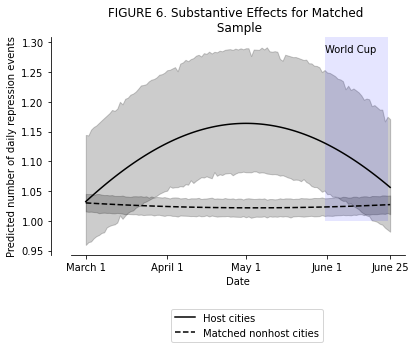

In [2249]:
fig, ax = plt.subplots()

a = sns.lineplot(ax = ax,data = test_df,x = 'time',y = 'out_log',
                 color='black', label = 'Host cities') # label for the legend helps

b = sns.lineplot(ax = ax,data = test_df2,x = 'time',y = 'out_log',
                 color='black',linestyle='--', label = 'Matched nonhost cities')

x = [0.01, 0.32, 0.62, 0.93, 1.17]

labels = ['March 1','April 1','May 1','June 1','June 25',]

ax.set_ylabel('Predicted number of daily repression events')

# x axis title 
plt.xlabel('Date')

plt.xticks(x, labels)

rec1=Rectangle((0.92, 1), 0.24, 6, #1.17-0.93fc 
                           #fill=False,
                            alpha=0.1,
                            facecolor="blue")

ax.add_patch(rec1)

ax.set_title('FIGURE 6. Substantive Effects for Matched \n Sample')

fig.text(0.715, 0.83, r'World Cup')
# add legend 

# asthetics for x'x, y'y
# format for asthetic in axis x'x y'y 
ax.spines['left'].set_position(('outward', 20))

# remove up-right "axis"
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# fix legend 
plt.legend(loc=[0.3,-0.4])

plt.show()

## Interpretation 

* Firstly let's remind the two Hypothesis: 
    * H1: In the run-up to an international sports tournament, state repression spikes in host cities, but not in other cities.

    * H2: During an international sports tourna- ment, state repression drops in host cities but remains unchanged in other cities.
    -----------------------------
    
* We observe that line for **Host Cities** (**continuous black line**, see legend) verifies the Hypothesis (H1), (H2) [the logic in analysis is similar with **Q2** interpretation]. In short, we can observe that in the run-up to an international sports tournament, state repression spikes in host cities (H1) as flow of Host Cities line increases before June 1 (x'x axis). During an international sports tournament, state repression drops in host cities (H2) we can see the Host Cities line that drops (**after June 1** see x'x).

* We observe that line for **Matched nonhost cities**, (**not continuous** black line see legend) verifies the Hypothesis (H1), (H2) [the logic in analysis is similar with **Q2** interpretation].  In short, for hypothesis 1 , we can observe that in the run-up to an international sports tournament repression is at low level in matched nonhost cities (in other cities) as flow of Mached nonhost cities is at low level  before June 1 (World Cup). For hypothesis 2, we can observe that during an international sports tournament repression remains unchanged in other cities as flow of Mached nonhost cities line seem to remain from a point constant.  

* In addition, at the plot we can see that there are confidence intervals. A confidence interval is the mean of our estimate plus and minus the variation in that estimate. For this plot we used seaborn as it is by default the confidence interval 95%. This is the range of values we expect our estimate to fall between if we redo our test, within a certain level of confidence.
In other words, for eaxmple for confidence interval for the **Host Cities** means for date **March 1** , if we make 100 an experiment, 95 times the prediction for the number of repression phenomena will be included  in the range about 0.3 - 1.2.